# Domain Analysis 

### Import Libraries 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
data = pd.read_csv("raisin1.csv")

In [3]:
data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,Unnamed: 8
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,1,NaN
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,1,NaN
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,1,NaN
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,1,NaN
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,1,NaN
...,...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,0,NaN
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,0,NaN
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,0,NaN
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,0,NaN


### Basic Operations 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    int64  
 8   Unnamed: 8       0 non-null      float64
dtypes: float64(6), int64(3)
memory usage: 63.4 KB


In [5]:
data.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,Unnamed: 8
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,0.0
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636,0.500000,NaN
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315,0.500278,NaN
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000,0.000000,NaN
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750,0.000000,NaN
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000,0.500000,NaN
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750,1.000000,NaN
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000,1.000000,NaN


In [6]:
data.isnull()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,Unnamed: 8
0,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...
895,False,False,False,False,False,False,False,False,True
896,False,False,False,False,False,False,False,False,True
897,False,False,False,False,False,False,False,False,True
898,False,False,False,False,False,False,False,False,True


In [7]:
data.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class', 'Unnamed: 8'],
      dtype='object')

In [8]:
data.head(2)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,Unnamed: 8
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,1,NaN
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,1,NaN


In [9]:
data.tail()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,Unnamed: 8
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,0,NaN
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,0,NaN
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,0,NaN
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,0,NaN
899,85609,512.081774,215.271976,0.907345,89197,0.632020,1272.862,0,NaN


In [11]:
data.shape

(900, 9)

In [13]:
data[data.duplicated()]

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,Unnamed: 8


In [15]:
data.nunique()

Area               900
MajorAxisLength    900
MinorAxisLength    900
Eccentricity       900
ConvexArea         896
Extent             900
Perimeter          900
Class                2
Unnamed: 8           0
dtype: int64

# Exploratory Data Analysis

<Axes: xlabel='Area', ylabel='Count'>

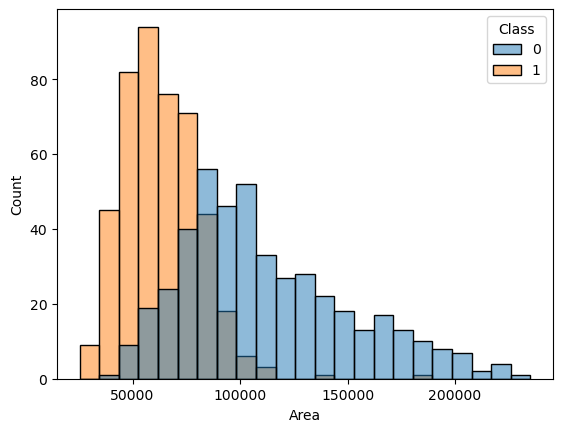

In [16]:
sns.histplot(x='Area',hue='Class',data=data)

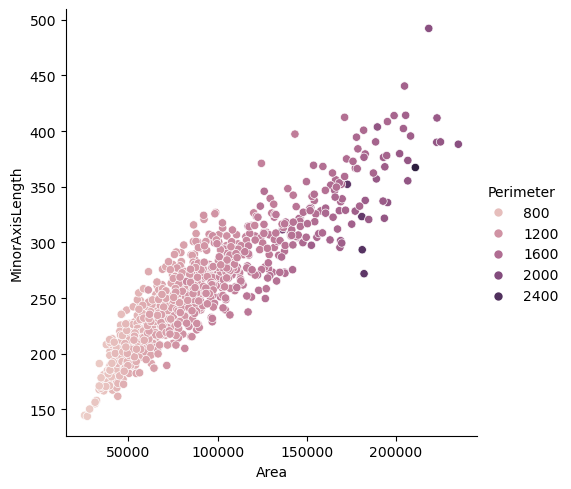

In [19]:
sns.relplot(x='Area',y='MinorAxisLength',hue='Perimeter',data=data)
plt.show()

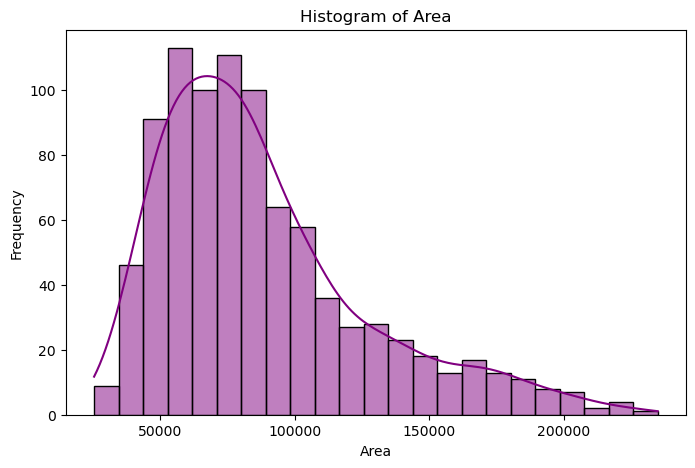

<Figure size 640x480 with 0 Axes>

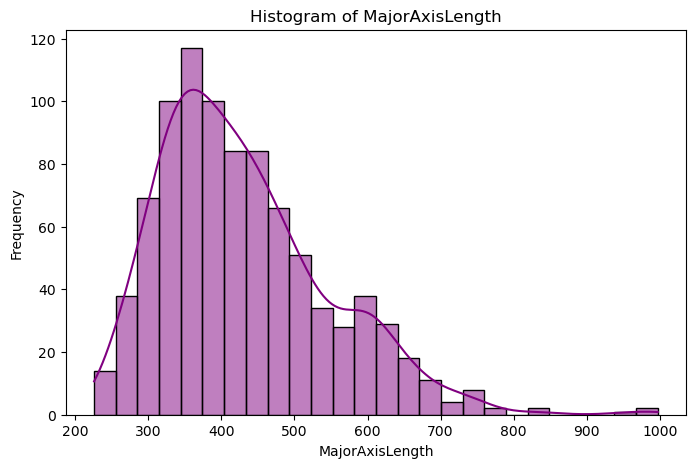

<Figure size 640x480 with 0 Axes>

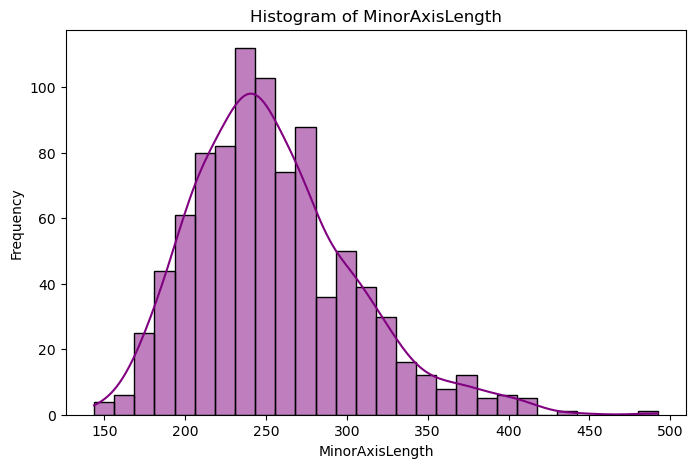

<Figure size 640x480 with 0 Axes>

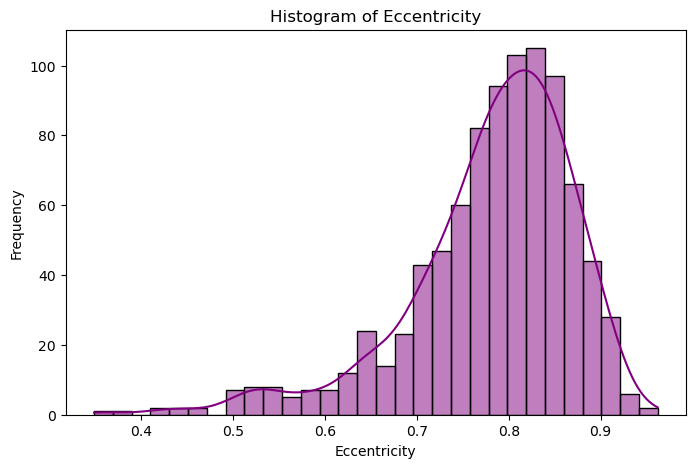

<Figure size 640x480 with 0 Axes>

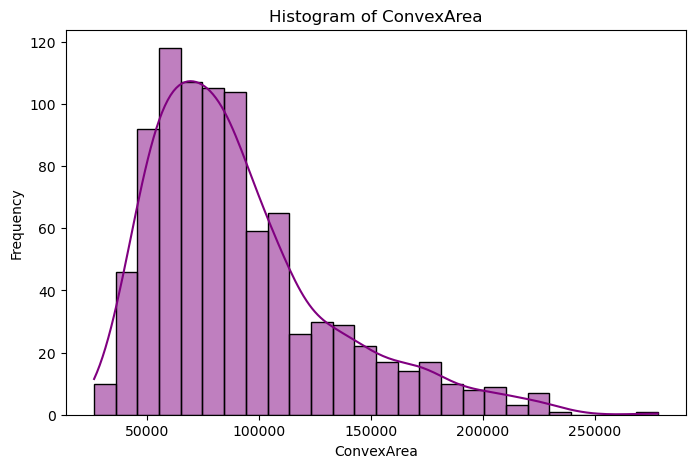

<Figure size 640x480 with 0 Axes>

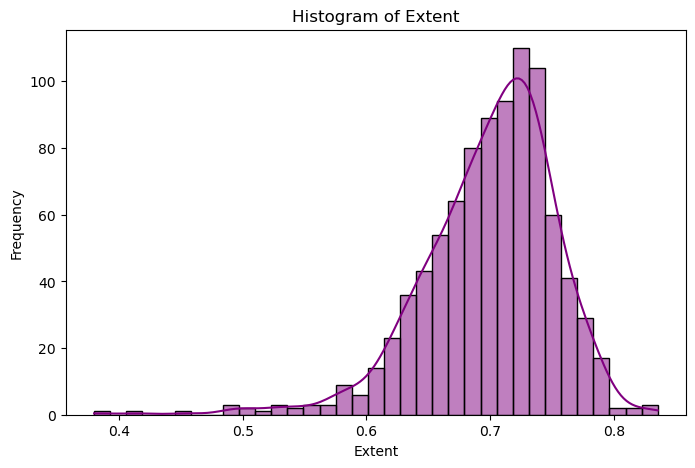

<Figure size 640x480 with 0 Axes>

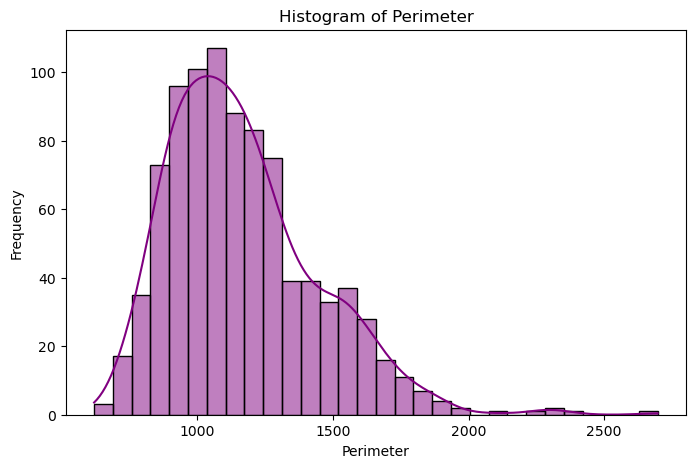

<Figure size 640x480 with 0 Axes>

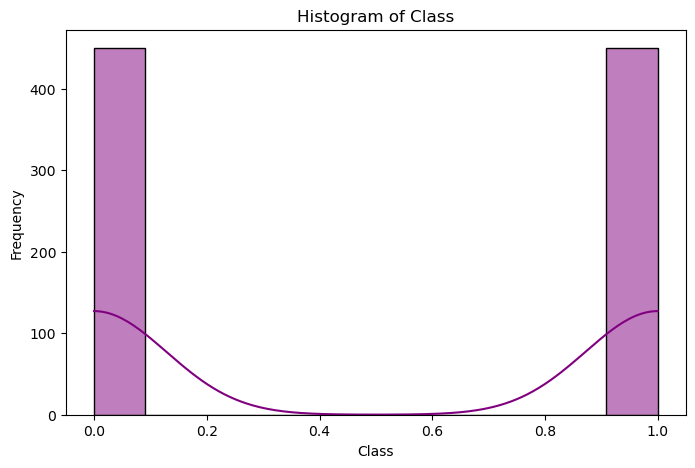

<Figure size 640x480 with 0 Axes>

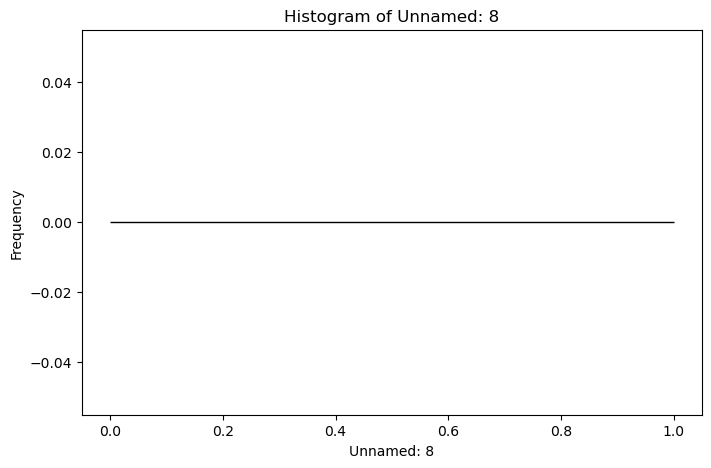

<Figure size 640x480 with 0 Axes>

In [22]:
for column in data.columns:
    if data[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(8,5))
        sns.histplot(data[column],kde=True,color='Purple')
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()
        plt.tight_layout()
    # For categorical columns, plot a countplot
    else:
        plt.figure(figsize=(8, 6))
        sns.countplot(x=column, data=data, palette='viridis')
        plt.title(f'Countplot of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

In [27]:
data.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class', 'Unnamed: 8'],
      dtype='object')

In [44]:
## Create a new dataframe with categorical variables
data1=data[['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class', 'Unnamed: 8']]

In [45]:
data1

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,Unnamed: 8
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,1,NaN
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,1,NaN
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,1,NaN
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,1,NaN
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,1,NaN
...,...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,0,NaN
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,0,NaN
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,0,NaN
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,0,NaN


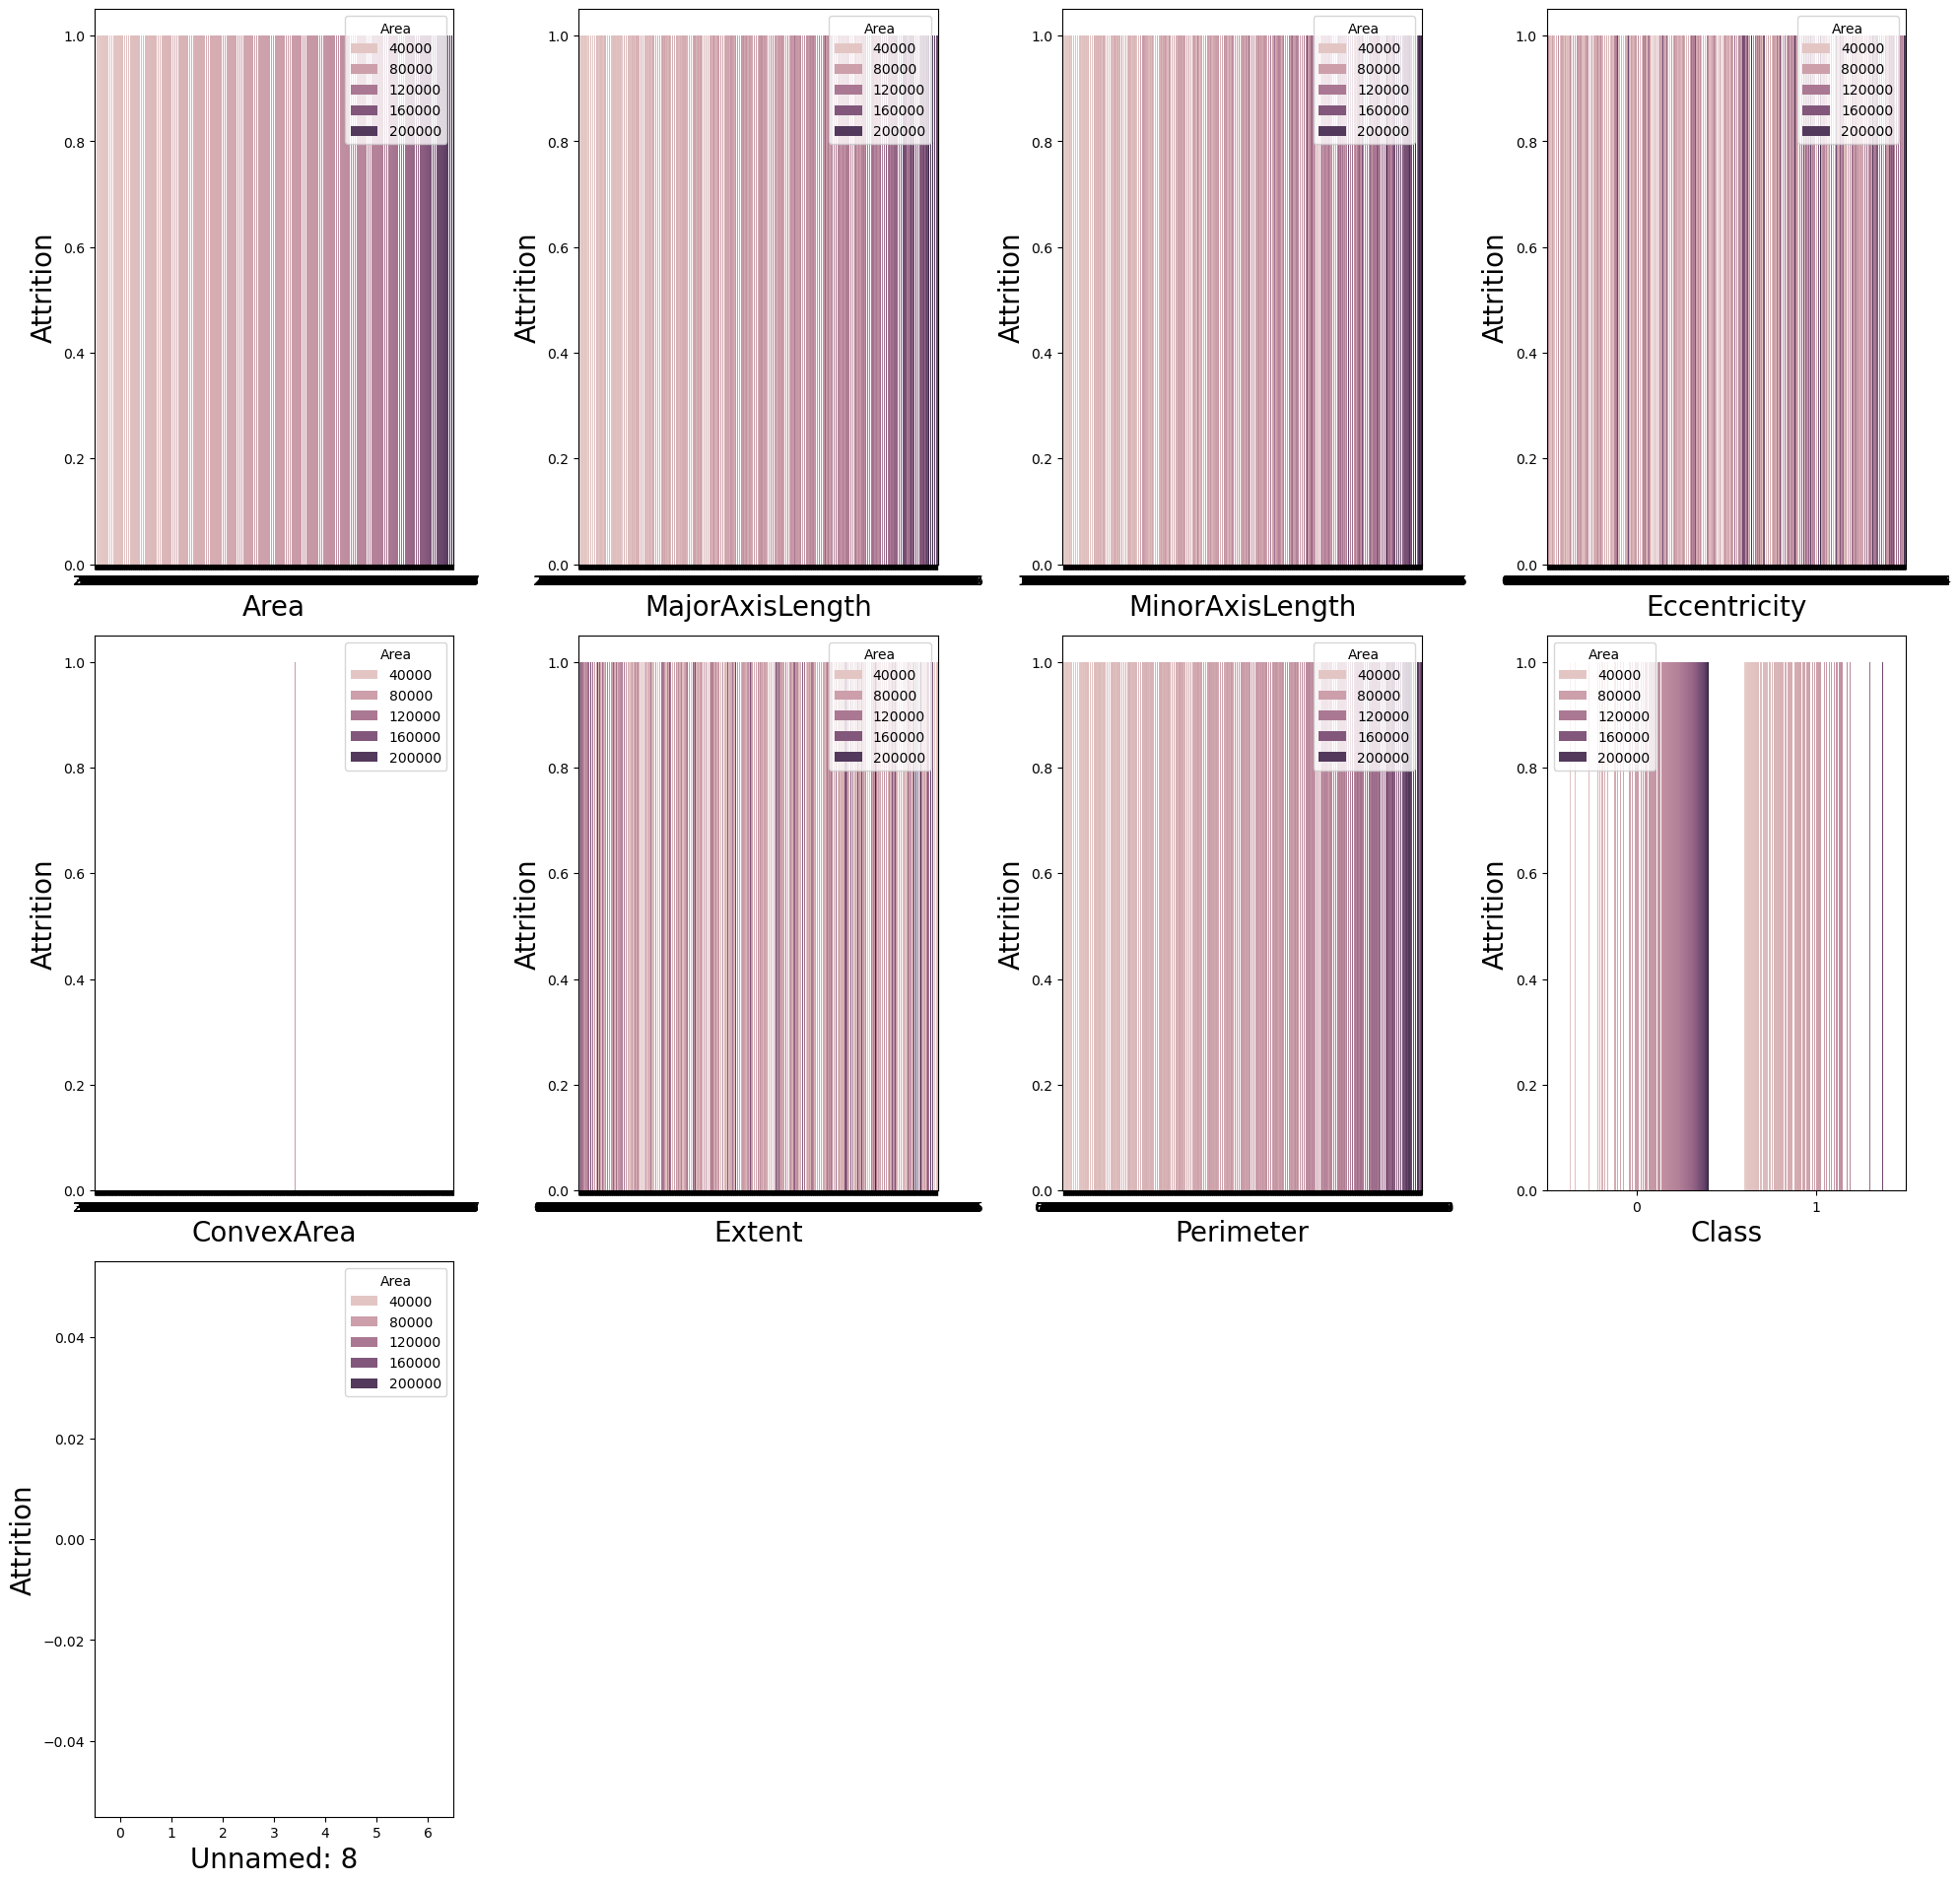

In [34]:
plt.figure(figsize=(20,25), facecolor='white')#canvas size
plotnumber = 1#count variable
for column in data1:#for loop to acess columns form data1
    if plotnumber<=16 :#checking whether count variable is less than 16 or not
        ax = plt.subplot(4,4,plotnumber)#plotting 8 graphs in canvas(4 rows and 4 columns)
        sns.countplot(x=data1[column]           #plotting count plot
                        ,hue=data.Area)
        plt.xlabel(column,fontsize=20)#assigning name to x-axis and increasing it's font
        plt.ylabel('Attrition',fontsize=20)#assigning name to y-axis and increasing it's font
    plotnumber+=1#increasing counter
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Correlation Plot'}>

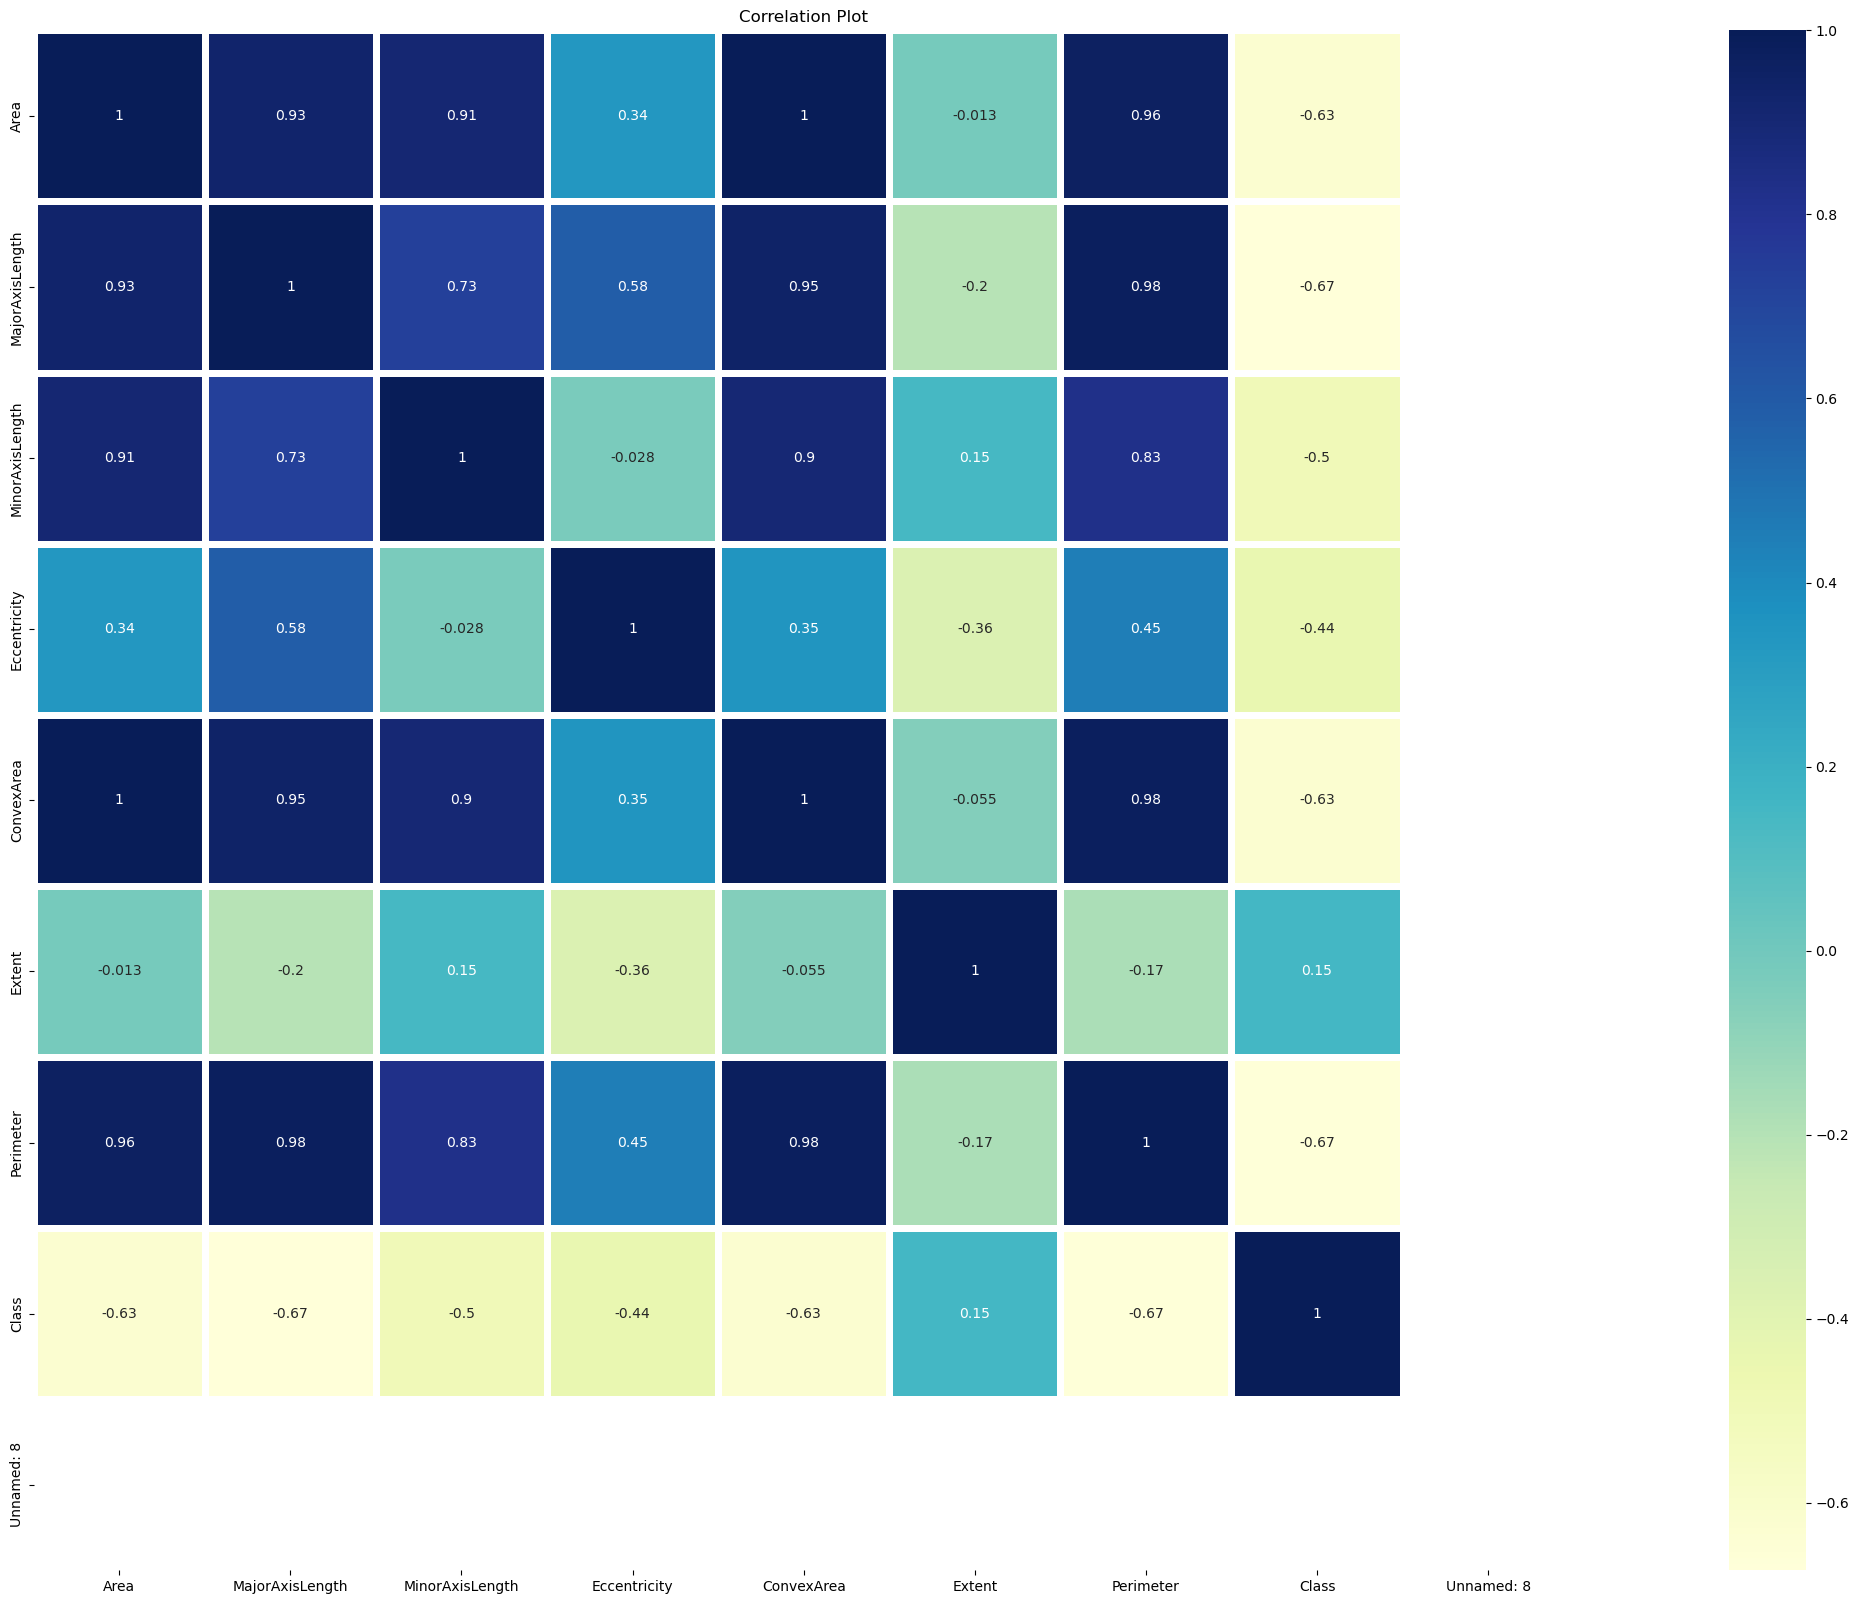

In [37]:
plt.figure(figsize=(40,20))
plt.title("Correlation Plot")
sns.heatmap(data.corr(),linewidths=5, annot=True, square=True,annot_kws={'size': 10},cmap='YlGnBu')

Imported v0.1.901. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (900, 9)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of D

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Area,int64,0.000000,100,25387.000000,235047.000000,Possible ID column: drop before modeling step.
MajorAxisLength,float64,0.000000,NA,225.629541,997.291941,Column has 17 outliers greater than upper bound (717.30) or lower than lower bound(122.33). Cap them or remove them.
MinorAxisLength,float64,0.000000,NA,143.710872,492.275279,Column has 26 outliers greater than upper bound (371.05) or lower than lower bound(127.94). Cap them or remove them.
Eccentricity,float64,0.000000,NA,0.348730,0.962124,Column has 43 outliers greater than upper bound (0.99) or lower than lower bound(0.59). Cap them or remove them.
ConvexArea,int64,0.000000,99,26139.000000,278217.000000,"Column has 42 outliers greater than upper bound (178669.50) or lower than lower bound(-8780.50). Cap them or remove them., Column has a high correlation with ['MajorAxisLength', 'MinorAxisLength', 'Perimeter']. Consider dropping one of them."
Extent,float64,0.000000,NA,0.379856,0.835455,Column has 21 outliers greater than upper bound (0.83) or lower than lower bound(0.57). Cap them or remove them.
Perimeter,float64,0.000000,NA,619.074000,2697.753000,"Column has 17 outliers greater than upper bound (1821.36) or lower than lower bound(453.44). Cap them or remove them., Column has a high correlation with ['MajorAxisLength', 'MinorAxisLength']. Consider dropping one of them."
Class,int64,0.000000,0,0.000000,1.000000,No issue
Unnamed: 8,float64,100.000000,0,,,"Possible Zero-variance or low information colum: drop before modeling step., 900 missing values. Impute them with mean, median, mode, or a constant value such as 123."


Number of All Scatter Plots = 15


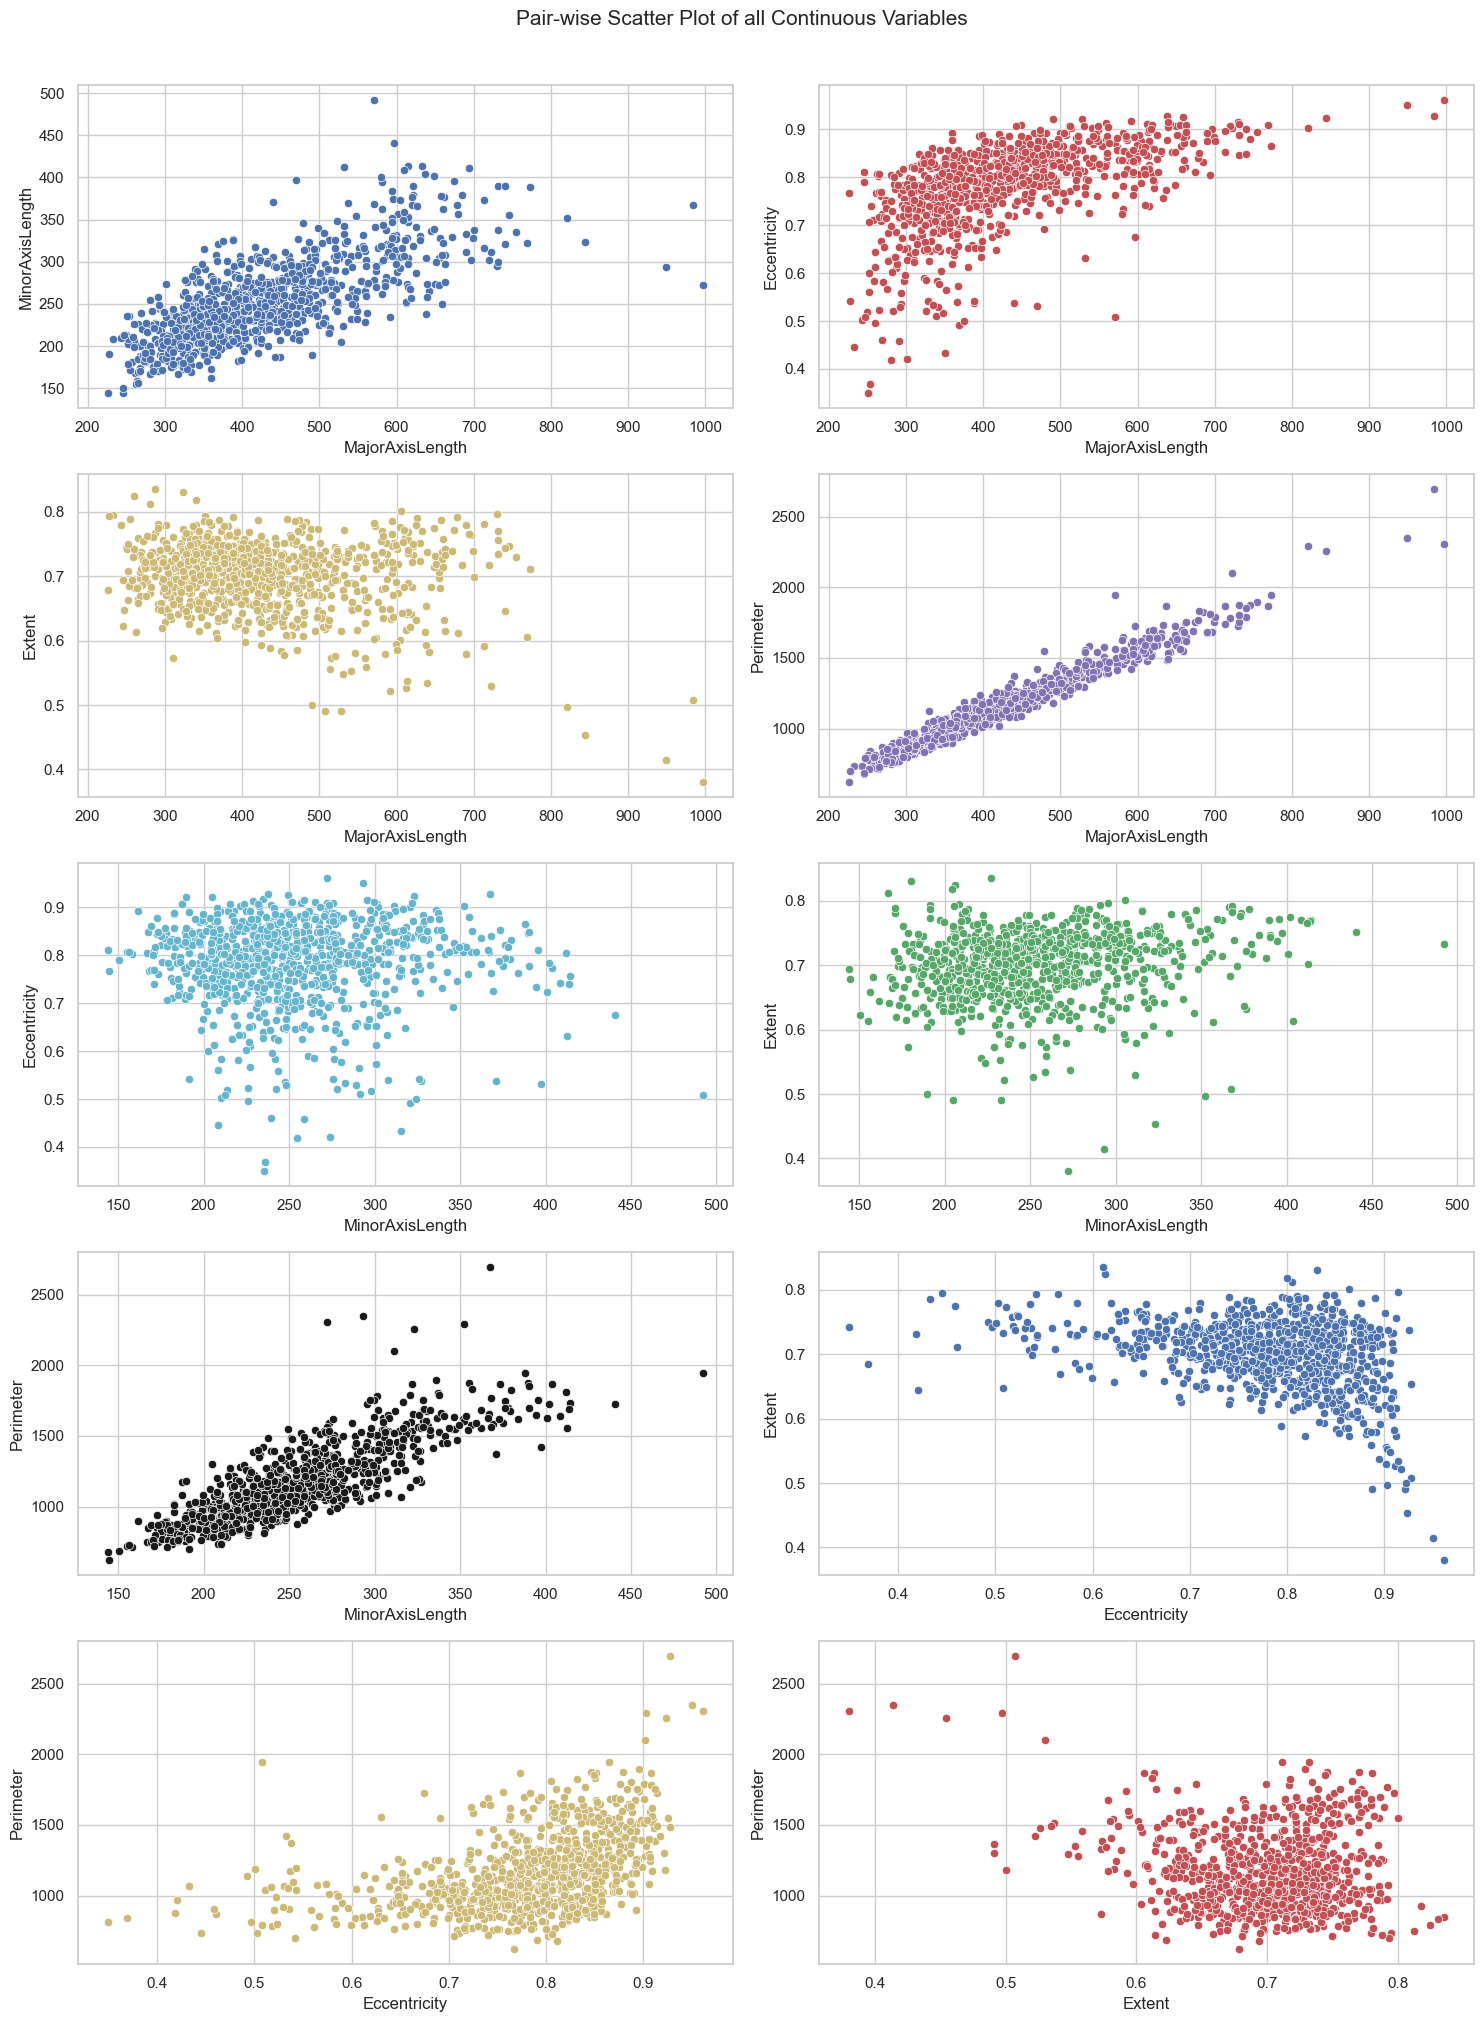

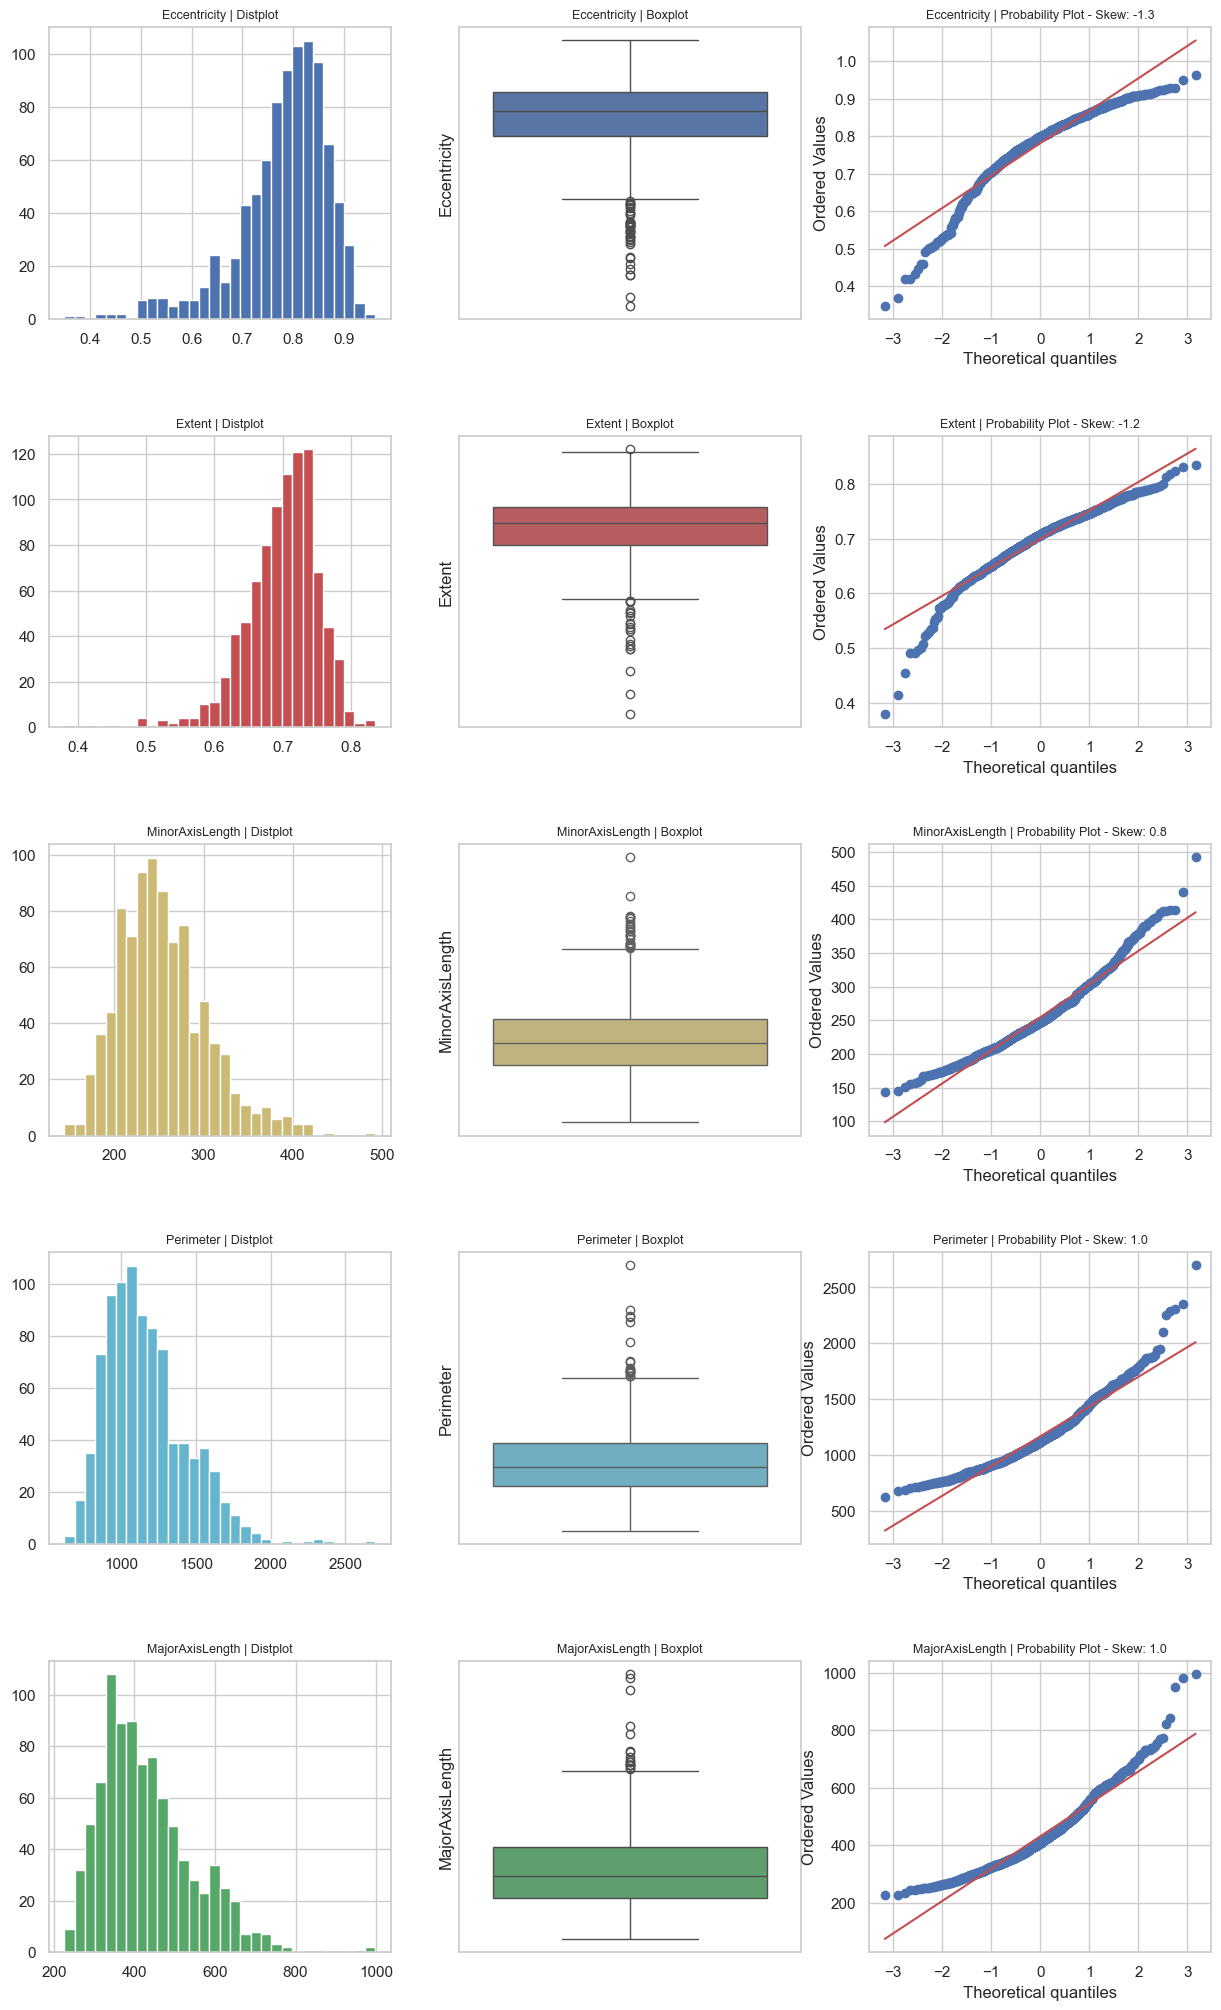

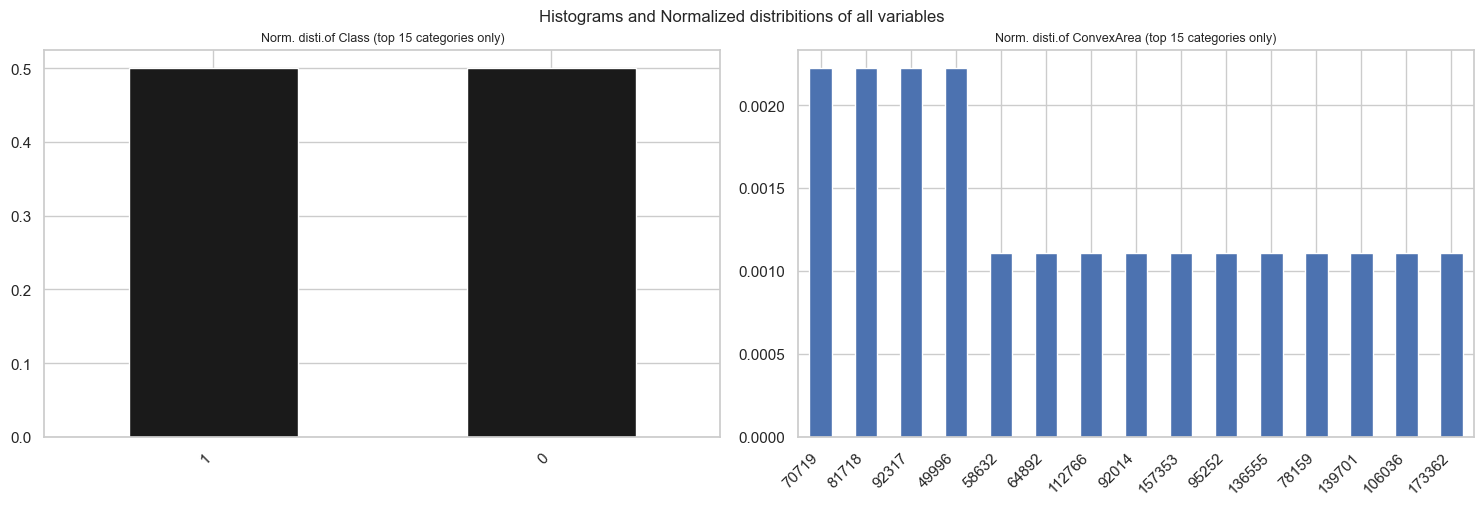

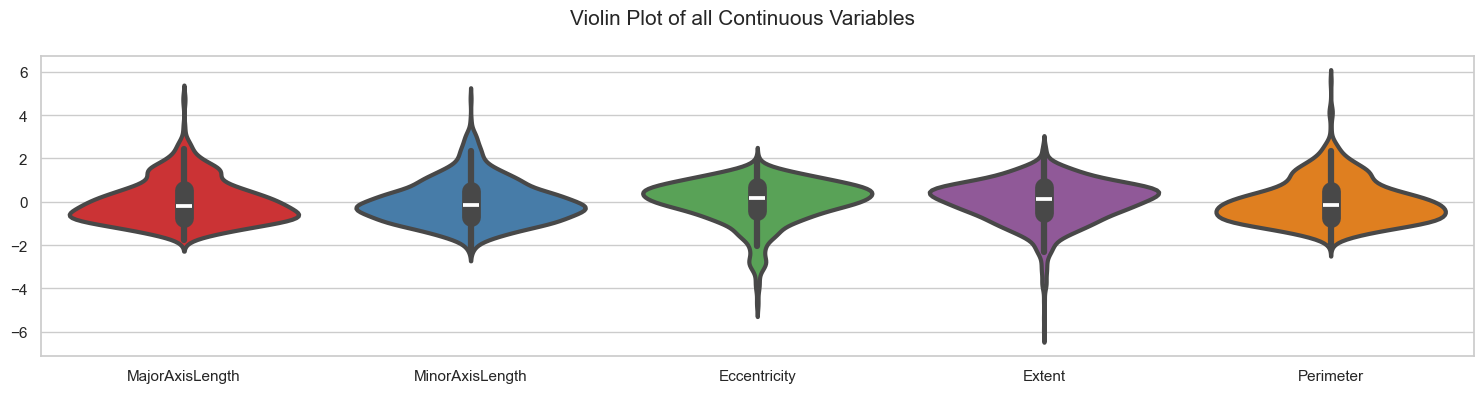

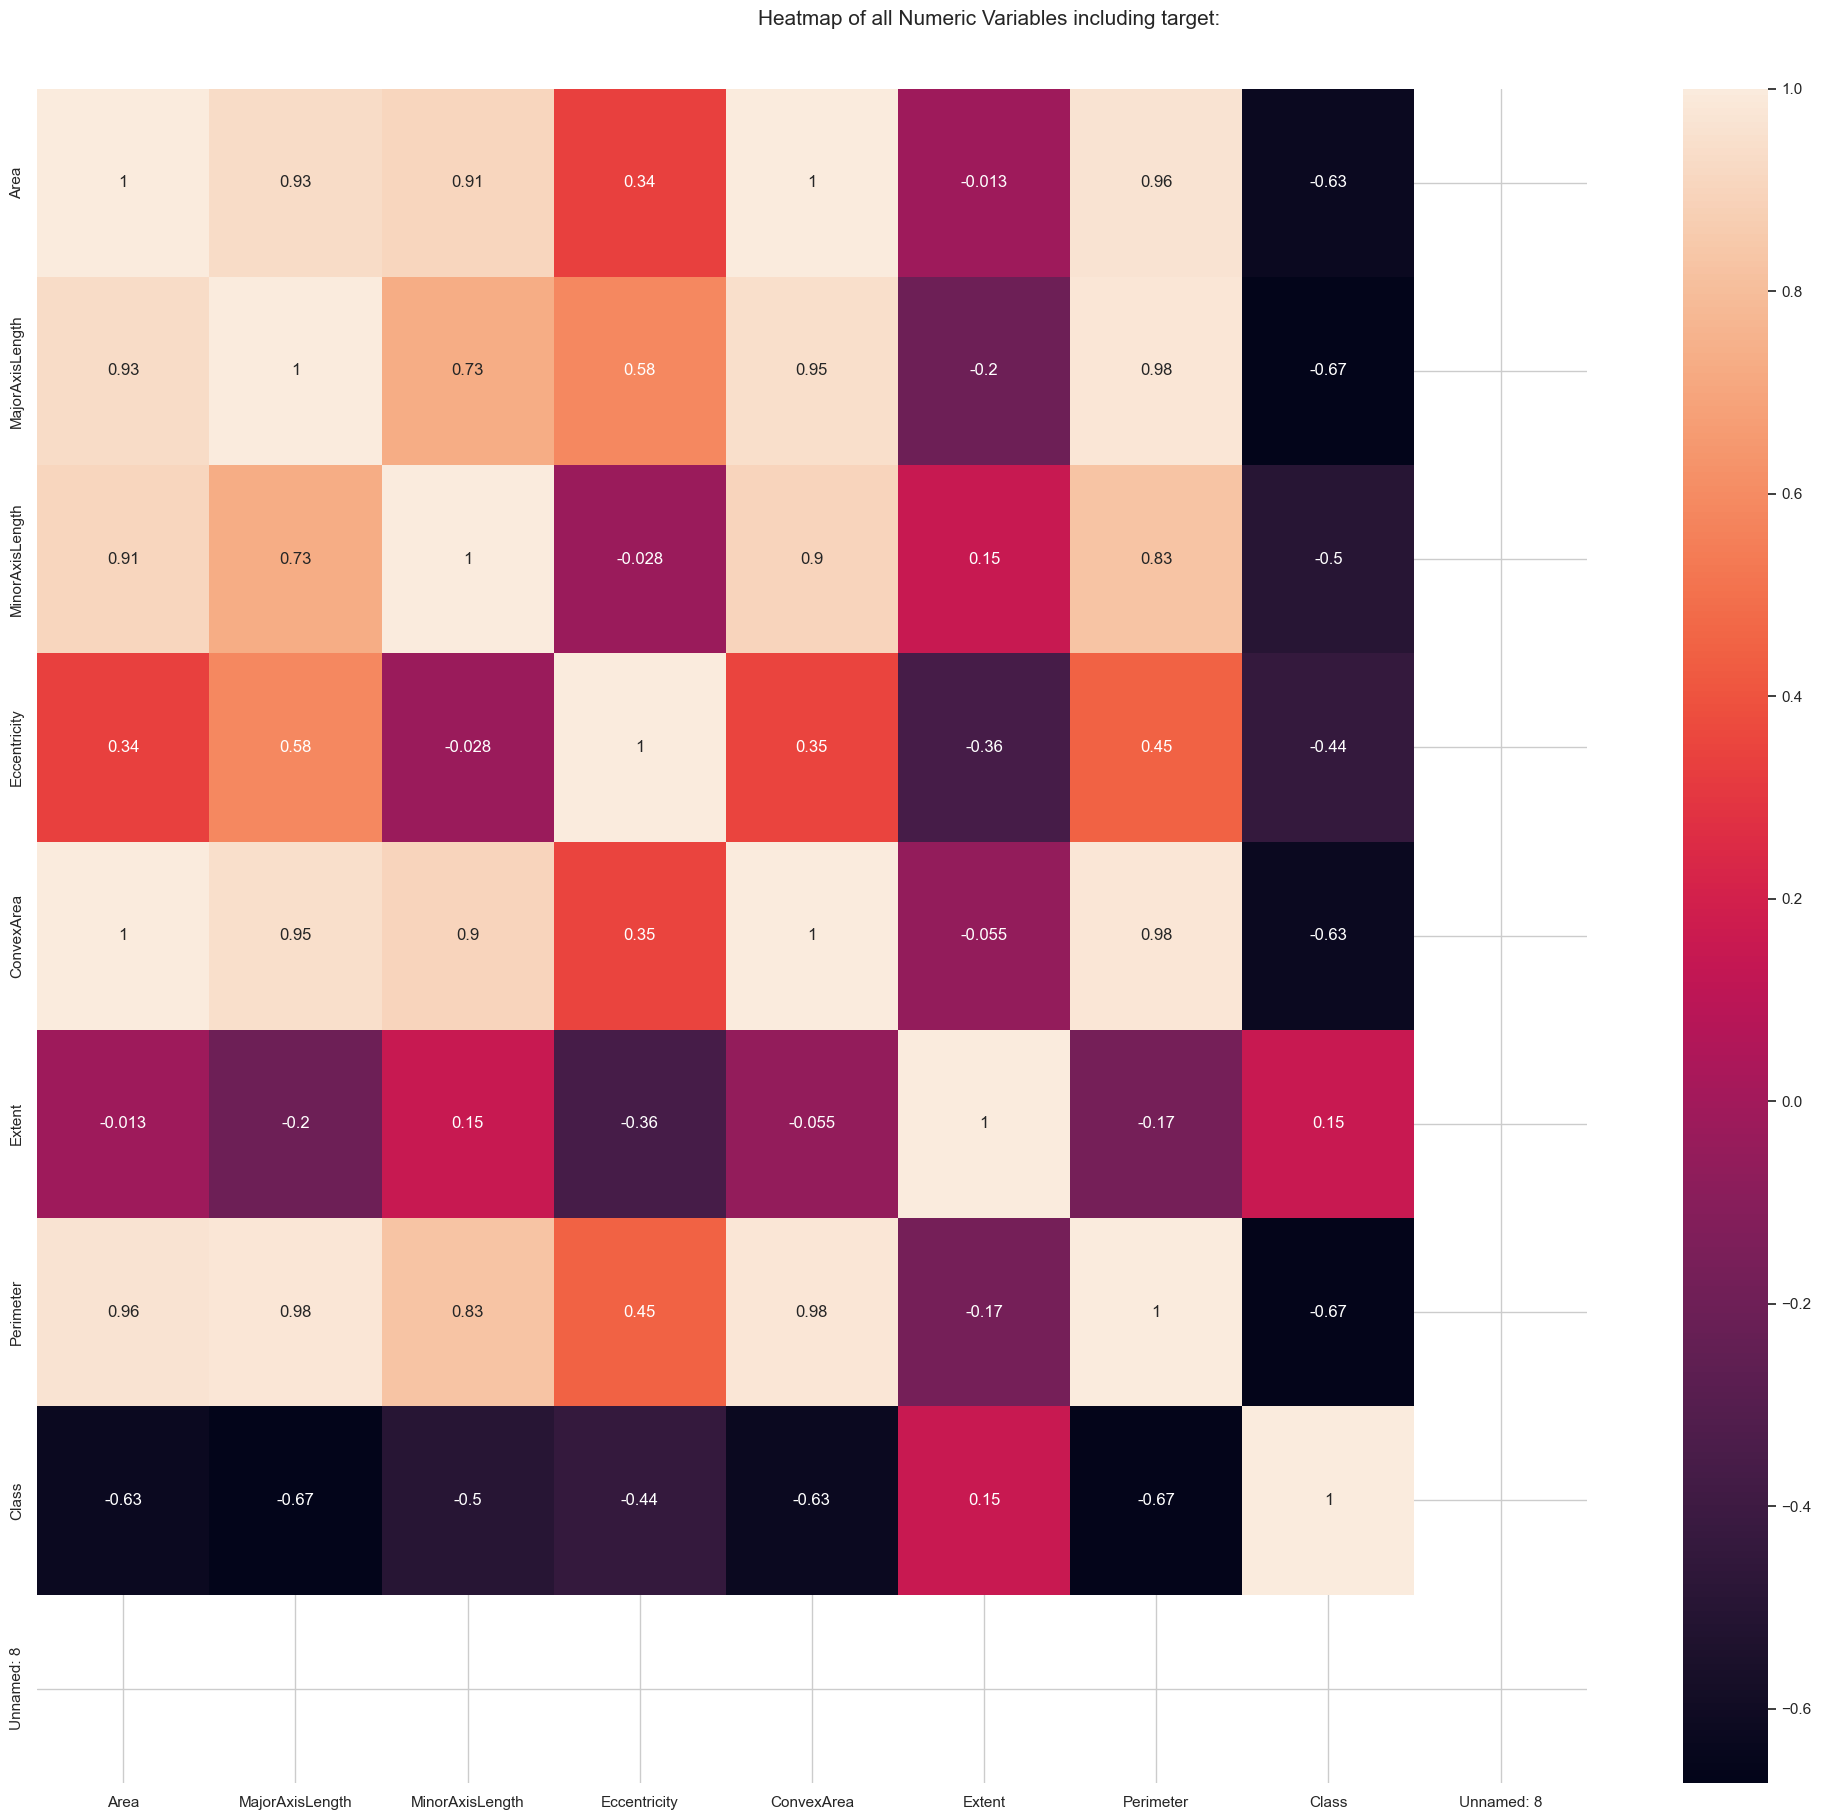

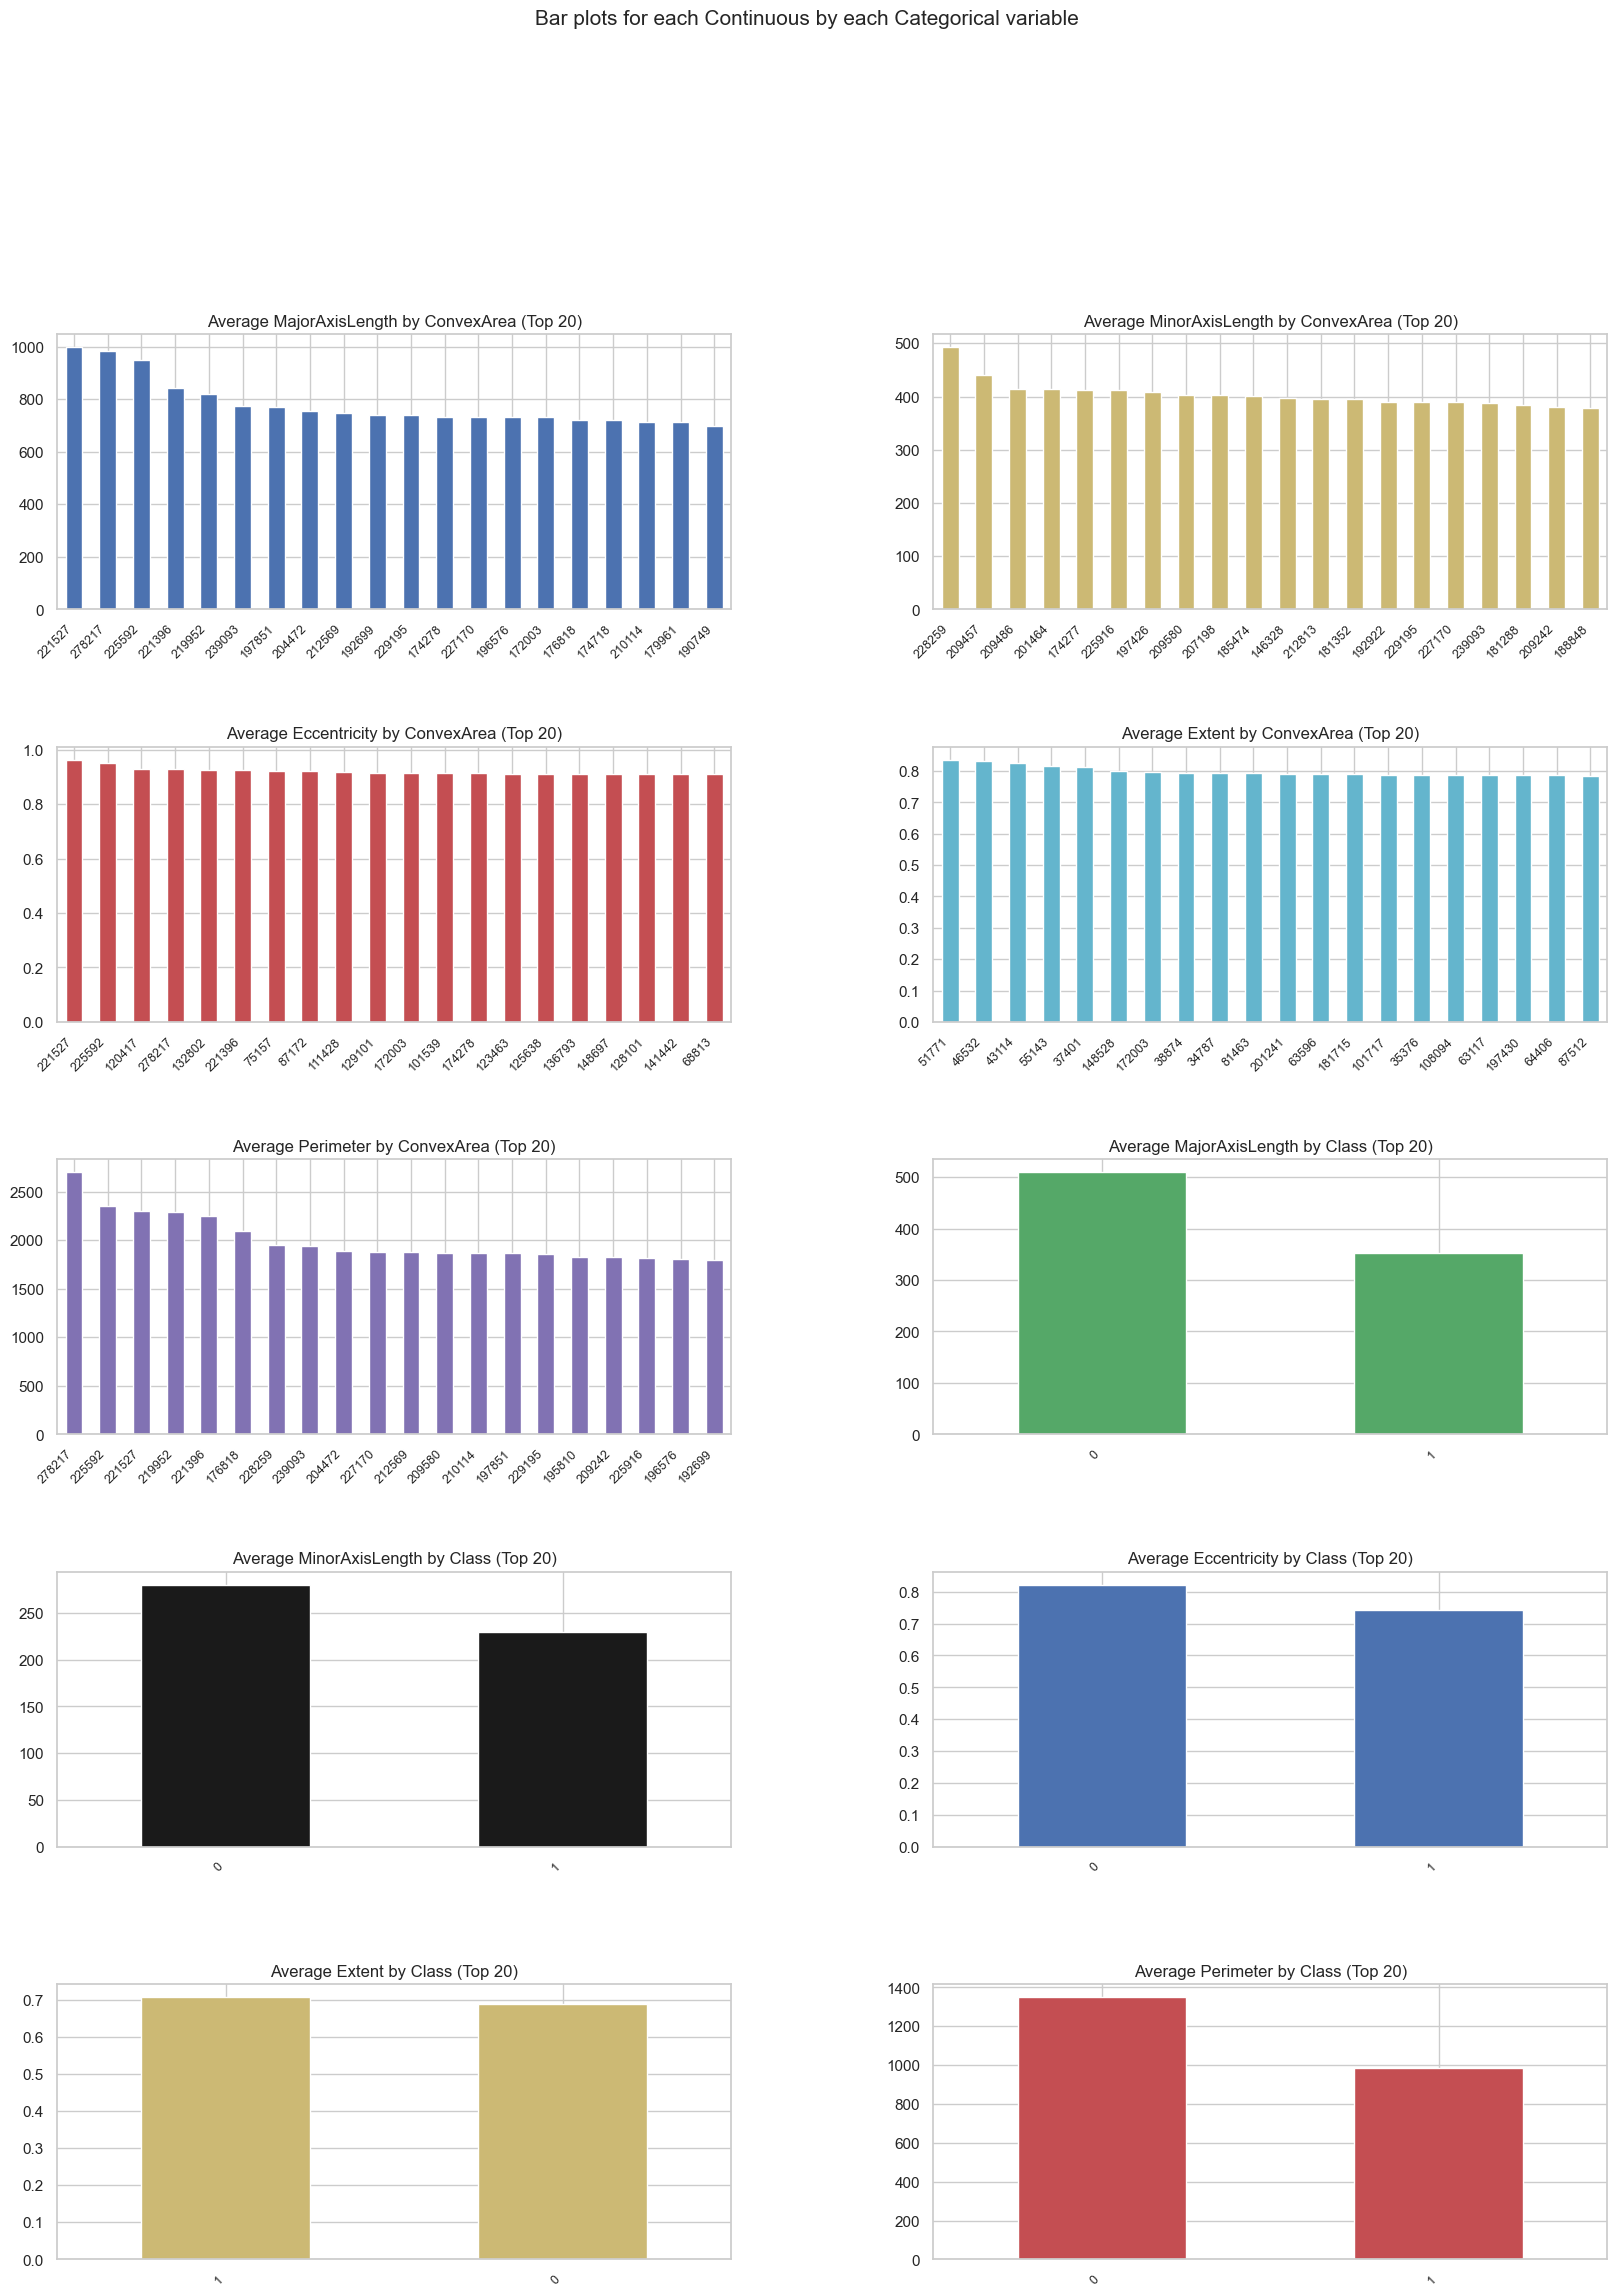

All Plots done
Time to run AutoViz = 12 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [38]:
from autoviz.AutoViz_Class import AutoViz_Class

%matplotlib inline

Av = AutoViz_Class()

viz = Av.AutoViz('raisin1.csv', sep=',')

In [39]:
Av = AutoViz_Class()
viz = Av.AutoViz('raisin1.csv', sep=',', chart_format='html')

Shape of your Data Set loaded: (900, 9)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  1
    9 Predictors classified...
        2 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['Area', 'Unnamed: 8']
No scatter plots with depVar when no depVar is g

Saving pair_scatters in HTML format


Saving distplots_nums in HTML format


Saving violinplots in HTML format


No date vars could be found in data set


Saving heatmaps in HTML format


Saving cat_var_plots in HTML format
                                                                                                                       

Time to run AutoViz (in seconds) = 14


<Axes: ylabel='Area'>

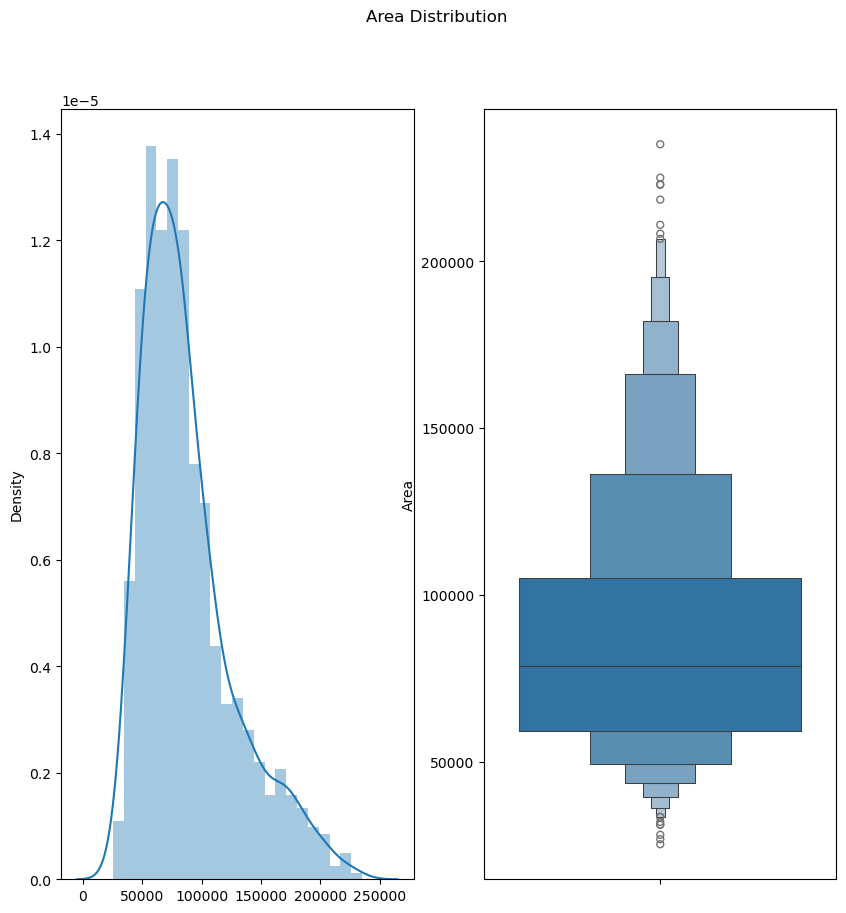

In [10]:
plt.figure(figsize=(10,10))
plt.suptitle('Area Distribution')
plt.subplot(1,2,1)
sns.distplot(x=data.Area)
plt.subplot(1,2,2)
sns.boxenplot(y=data.Area)

In [11]:
df2=data.sample(100)
df2.shape

(100, 9)

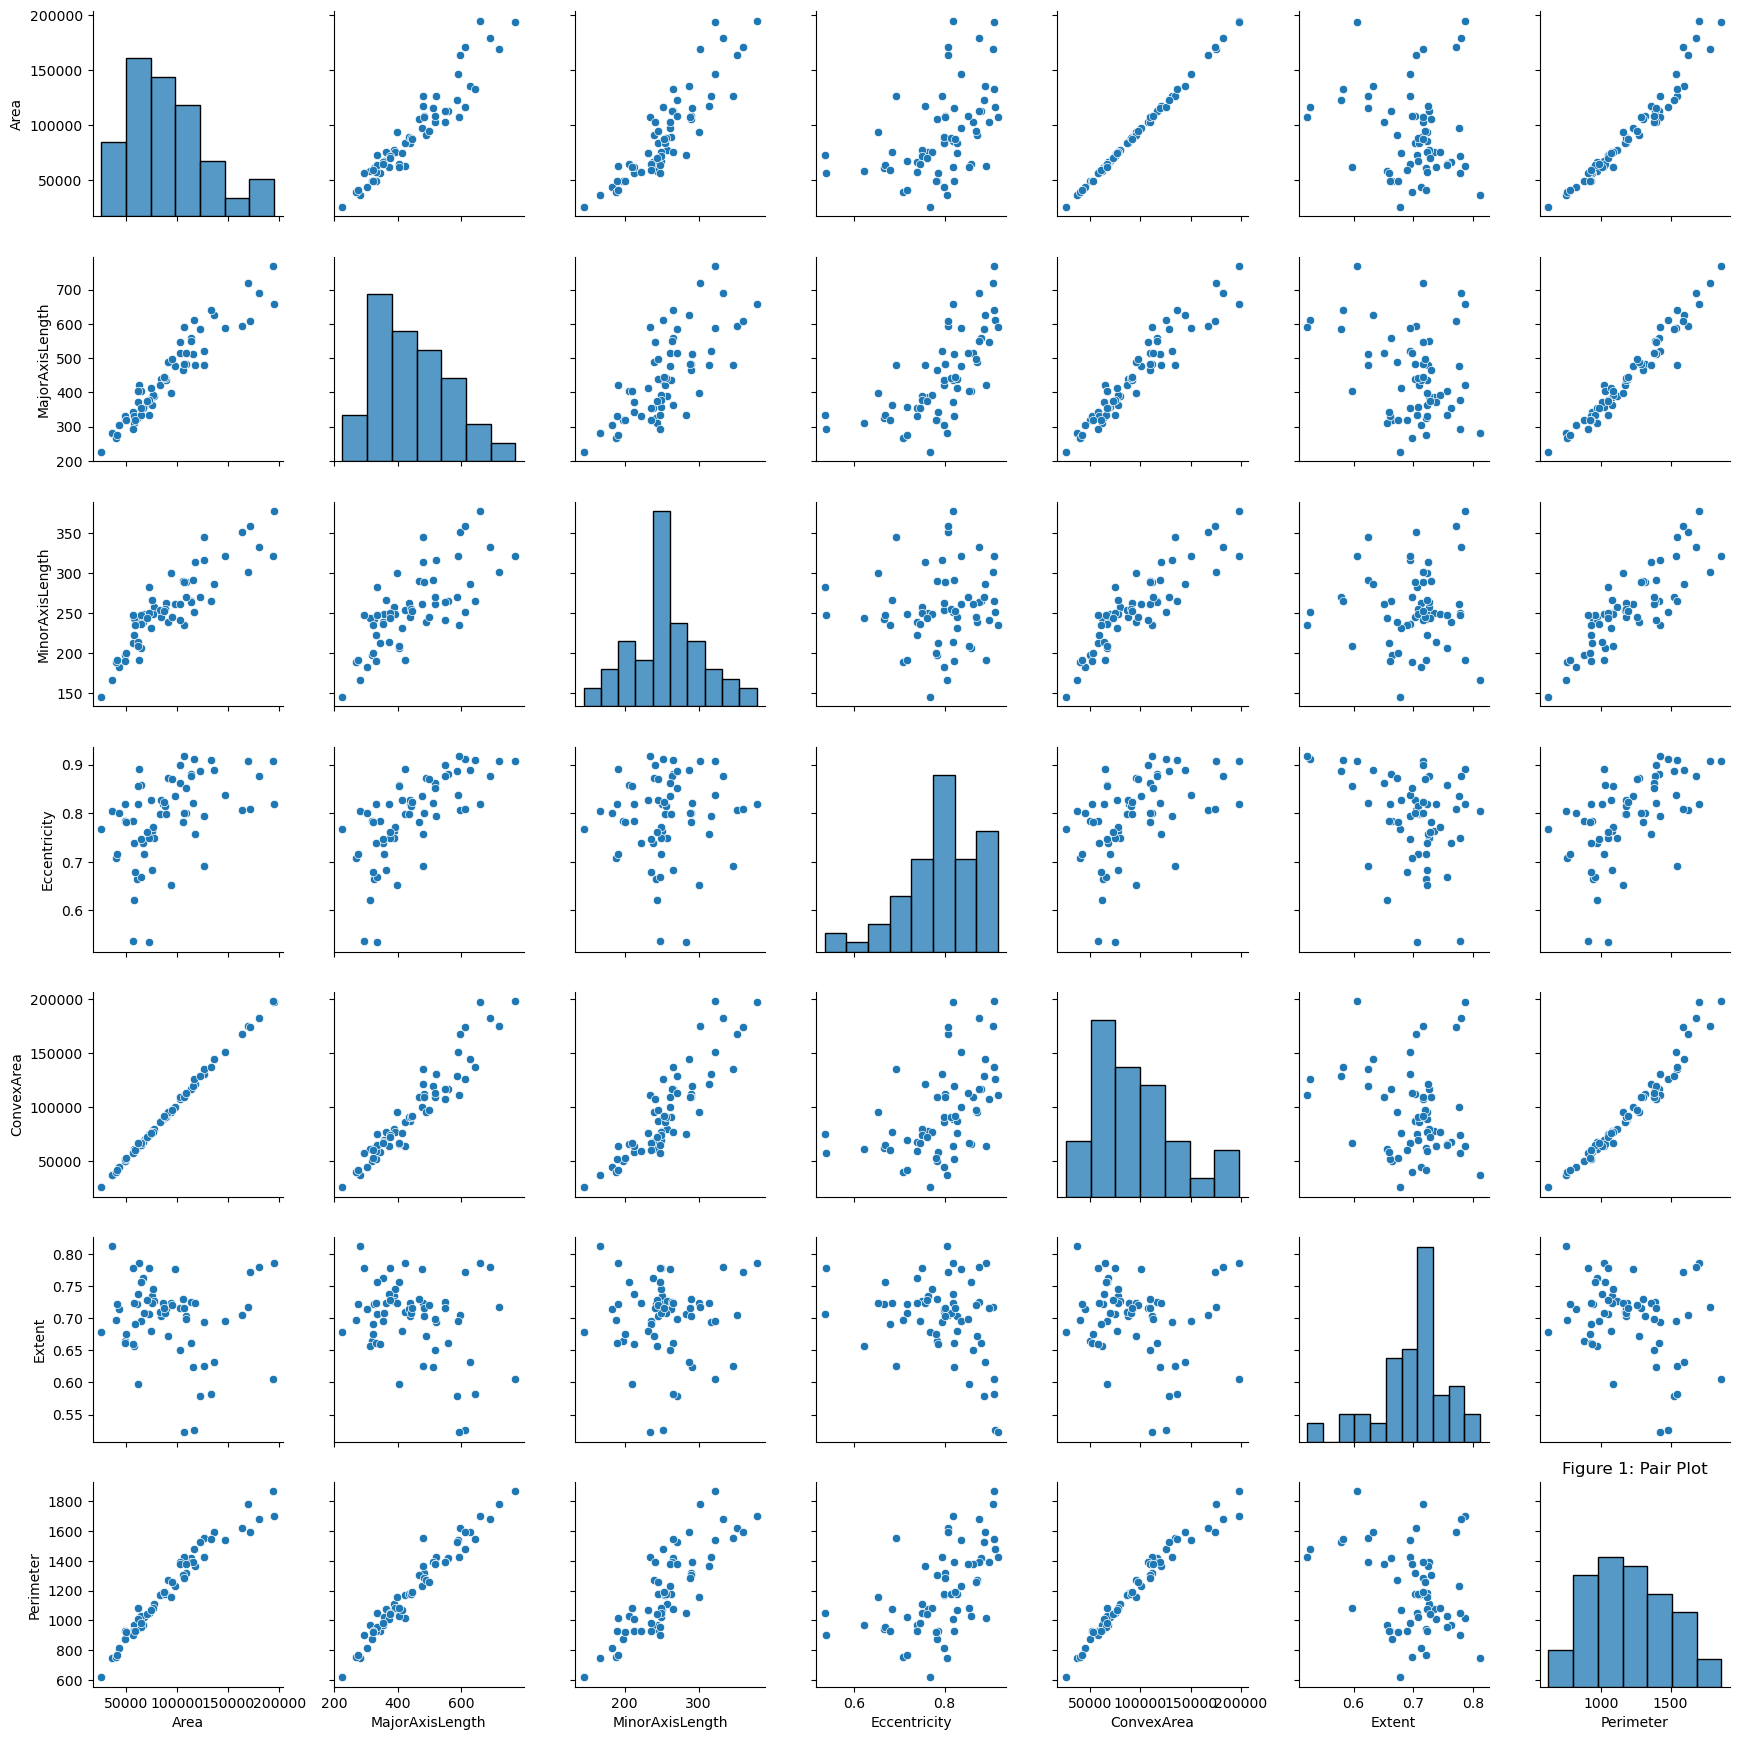

In [14]:
sns.pairplot(df2)
plt.title('Figure 1: Pair Plot')
plt.tight_layout()
plt.show()

In [89]:
data.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class', 'Unnamed: 8'],
      dtype='object')

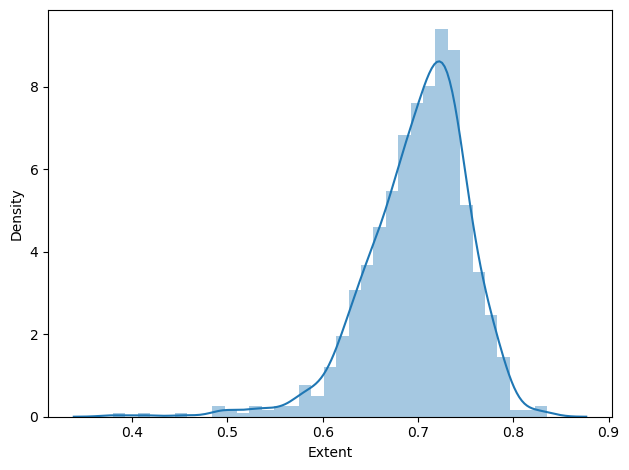

In [13]:
sns.distplot(data.Extent)
plt.tight_layout()
plt.title("")
plt.show()

In [90]:
data.dtypes

Area                 int64
MajorAxisLength    float64
MinorAxisLength    float64
Eccentricity       float64
ConvexArea           int64
Extent             float64
Perimeter          float64
Class                int64
Unnamed: 8         float64
dtype: object

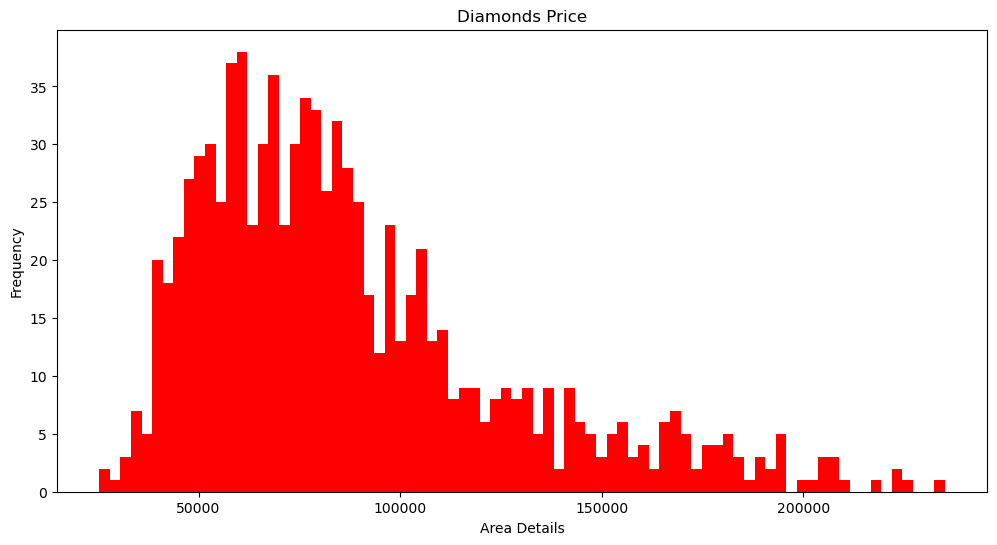

In [15]:
plt.figure(figsize=[12,6])
plt.hist(data["Area"], bins=80, color="red")
plt.xlabel("Area Details")
plt.ylabel("Frequency")
plt.title("Diamonds Price")
plt.show()

In [91]:
cutCounts=data['Perimeter'].value_counts()
cutCounts

1184.040    1
1394.100    1
1388.684    1
1502.661    1
1219.105    1
           ..
1103.153    1
970.754     1
989.499     1
1018.553    1
1272.862    1
Name: Perimeter, Length: 900, dtype: int64

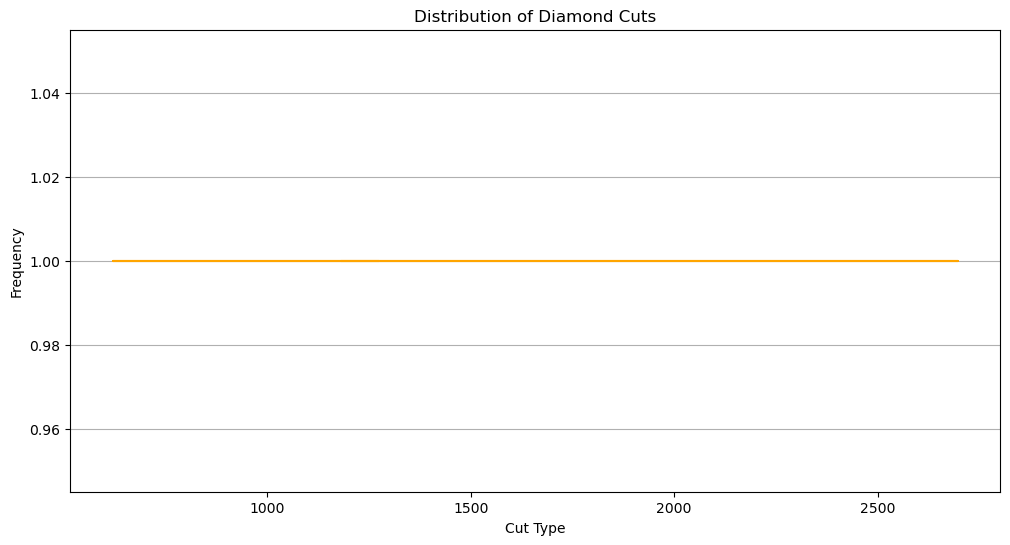

In [92]:
plt.figure(figsize=(12, 6))
cutCounts.plot(kind='line', color='orange')
plt.title('Distribution of Diamond Cuts')
plt.xlabel('Cut Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

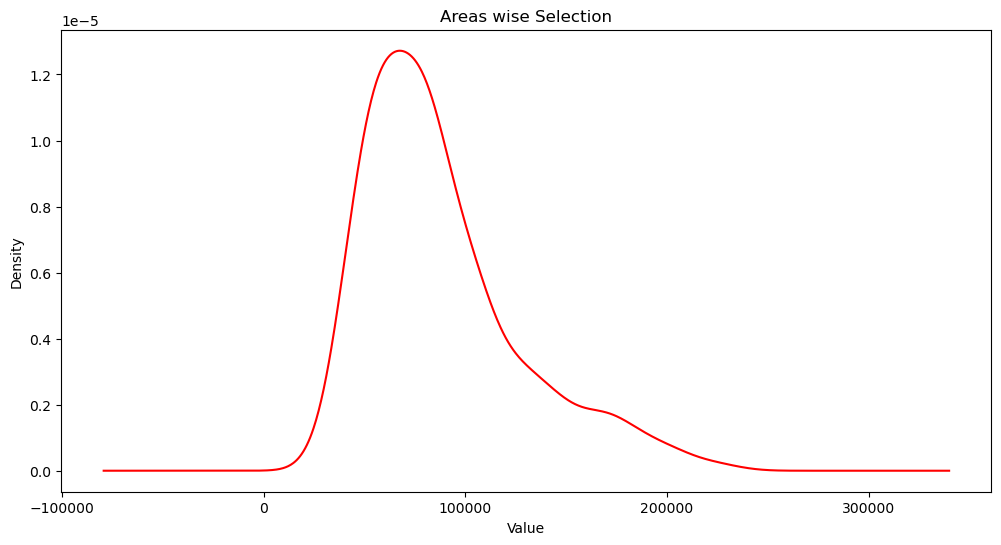

In [18]:
data['Area'].plot(kind='density',figsize=(12,6),color='red')
plt.xlabel("Value")
plt.title("Areas wise Selection")
plt.show()

In [93]:
data.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class', 'Unnamed: 8'],
      dtype='object')

<Axes: xlabel='Perimeter', ylabel='Density'>

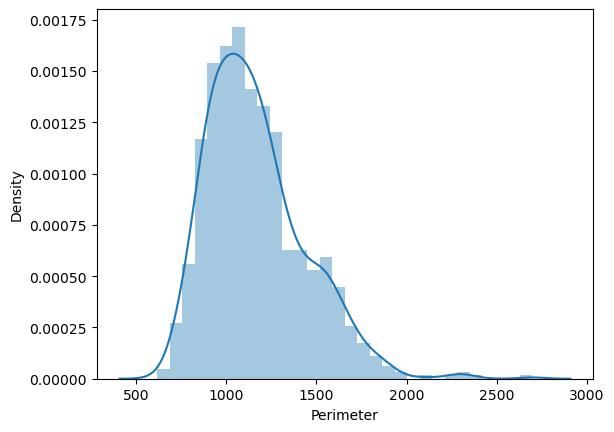

In [19]:
sns.distplot(data['Perimeter'])

<Axes: xlabel='ConvexArea', ylabel='Density'>

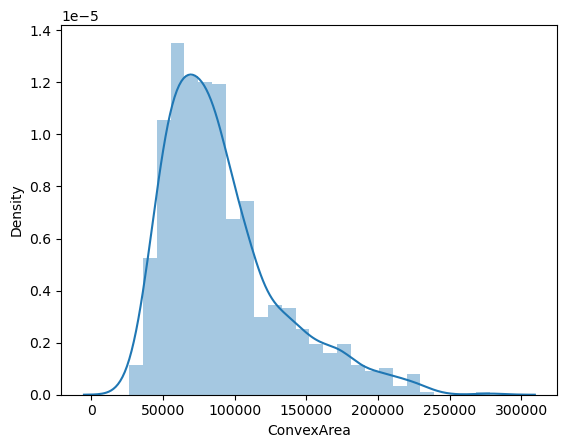

In [94]:
sns.distplot(data['ConvexArea'])

<Axes: xlabel='Perimeter', ylabel='Density'>

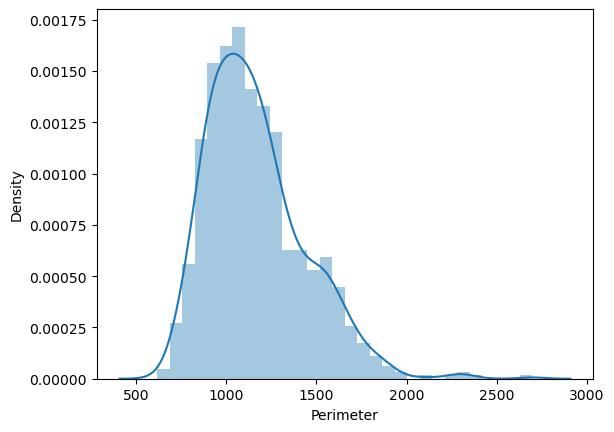

In [95]:
sns.distplot(data['Perimeter'])

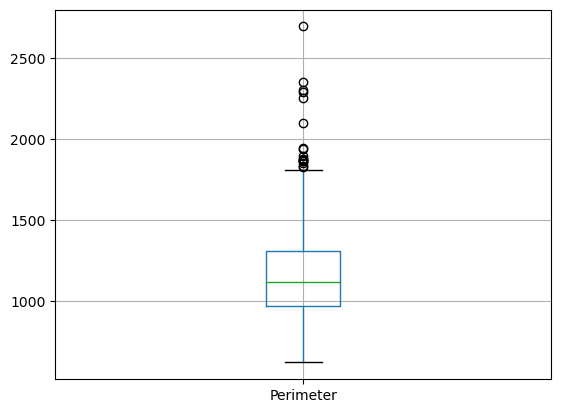

In [96]:
figure=data.boxplot(column="Perimeter") #check for the outliers

In [97]:
import numpy as np

<Axes: >

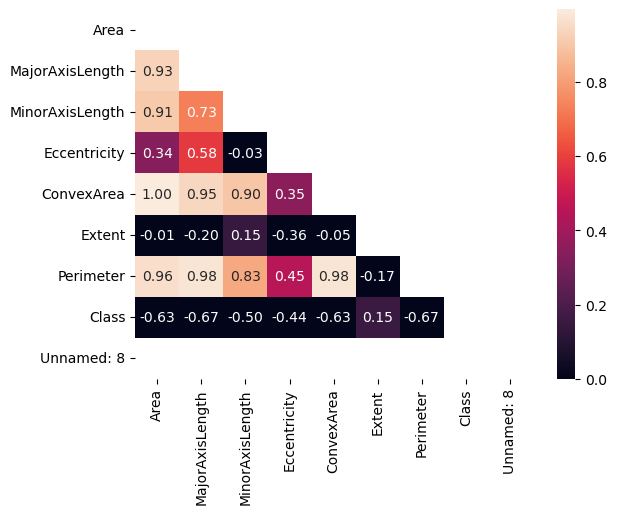

In [98]:
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
sns.heatmap(data.corr(), annot=True, mask=mask, fmt='.2f', vmin=0)

In [26]:
data.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class', 'EducationField'],
      dtype='object')

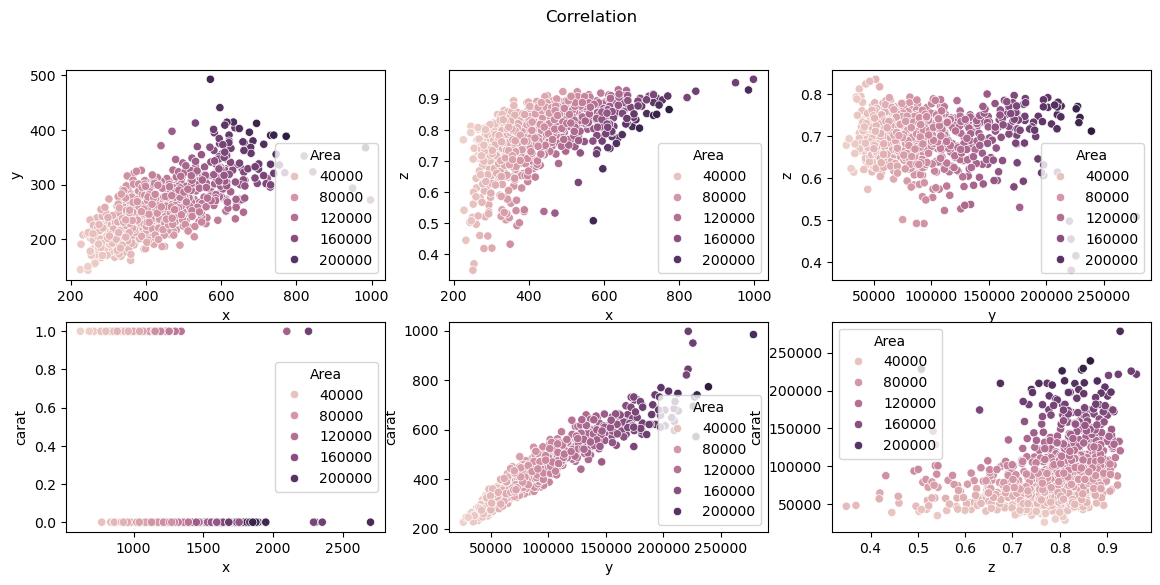

In [100]:
fig, axs = plt.subplots(2, 3, figsize=(14,6))
fig.suptitle('Correlation')
sns.scatterplot(data=data, x='MajorAxisLength', y='MinorAxisLength', ax=axs[0, 0], hue='Area', legend=True).set(xlabel='x', ylabel='y')
sns.scatterplot(data=data, x='MajorAxisLength', y='Eccentricity', ax=axs[0, 1], hue='Area', legend=True).set(xlabel='x', ylabel='z')
sns.scatterplot(data=data, x='ConvexArea', y='Extent', ax=axs[0, 2], hue='Area', legend=True).set(xlabel='y', ylabel='z')
sns.scatterplot(data=data, x='Perimeter', y='Class', ax=axs[1, 0], hue='Area', legend=True).set(xlabel='x', ylabel='carat')
sns.scatterplot(data=data, x='ConvexArea', y='MajorAxisLength', ax=axs[1, 1], hue='Area', legend=True).set(xlabel='y', ylabel='carat')
sns.scatterplot(data=data, x='Eccentricity', y='ConvexArea', ax=axs[1, 2], hue='Area', legend=True).set(xlabel='z', ylabel='carat')
plt.show()

In [101]:
# this a just testing my technique for actual customer should buy a diamond in Dollers
buy = data.copy()
buy['price'] = buy['MajorAxisLength'] / buy['Extent']
buy = buy.sort_values(by='price', ascending=True)
print(f"Best value for money: {round(min(buy['price']), 2)}$")
print("The first 3:\n")
buy.head(3)

Best value for money: 286.63$
The first 3:



,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,Unnamed: 8,price
275,33662,227.293792,191.109038,0.541343,34787,0.792999,699.415,1,NaN,286.625696
192,37569,232.427848,208.152006,0.444950,38874,0.794371,734.102,1,NaN,292.593431
235,39716,243.038280,210.114057,0.502580,40598,0.779433,737.468,1,NaN,311.814270


### Found Data is skewed

## If Features Are Skewed i am using the below Technique

In [102]:
# Lets compute the Interquantile range to calculate the boundaries
IQR=data.Perimeter.quantile(0.75)-data.Perimeter.quantile(0.25)
print(IQR)

341.97900000000004


In [103]:
lower_bridge=data['Perimeter'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['Perimeter'].quantile(0.75)+(IQR*1.5)
print("Lower_Bridge:",lower_bridge)
print("Upper_Bridge: ",upper_bridge)

Lower_Bridge: 453.44224999999994
Upper_Bridge:  1821.3582500000002


In [104]:
data.loc[data['Perimeter']>=18454.0,'price']=18454.0

In [105]:
data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,Unnamed: 8,price
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,1,NaN,NaN
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,1,NaN,NaN
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,1,NaN,NaN
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,1,NaN,NaN
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,1,NaN,NaN


In [106]:
def LABEL_ENCODING(c1):
    from sklearn import preprocessing
    label_encoder = preprocessing.LabelEncoder()
    data[c1]= label_encoder.fit_transform(data[c1])
    data[c1].unique()
LABEL_ENCODING("MajorAxisLength")
LABEL_ENCODING("MinorAxisLength")
LABEL_ENCODING("ConvexArea")
data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,Unnamed: 8,price
0,87524,553,500,0.819738,542,0.758651,1184.040,1,NaN,NaN
1,75166,446,409,0.801805,413,0.684130,1121.786,1,NaN,NaN
2,90856,554,581,0.798354,571,0.637613,1208.575,1,NaN,NaN
3,45928,54,159,0.684989,68,0.699599,844.162,1,NaN,NaN
4,79408,254,709,0.564011,445,0.792772,1073.251,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
895,83248,512,449,0.817263,492,0.668793,1129.072,0,NaN,NaN
896,87350,546,540,0.808629,549,0.636476,1214.252,0,NaN,NaN
897,99657,517,739,0.721684,650,0.741099,1292.828,0,NaN,NaN
898,93523,633,506,0.845739,600,0.658798,1258.548,0,NaN,NaN


In [107]:
X = data.drop('Perimeter',axis=1)

In [108]:
y = data['Perimeter']

In [109]:
from sklearn.model_selection import train_test_split #split the data set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [110]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(720, 9)
(180, 9)
(720,)
(180,)


# RandomForest Regressor

In [112]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=5,random_state=0)
RF.fit(X_train,y_train)

RandomForestRegressor(n_estimators=5, random_state=0)

In [113]:
rf = RF.score(X_train,y_train)
print(rf)

0.9932677801171584


# Conclusion